## Predicting the final grade of a student

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

**Attribute Information**:
- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - 1 hour)
- studytime - weekly study time (numeric: 1 - 10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
**these grades are related with the course subject, Math or Portuguese:**
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)
**Relevant Papers:**
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
Available at: <a href='http://www3.dsi.uminho.pt/pcortez/student.pdf'>Web Link</a>



**This notebook based on this kaggle notebook:** **<a href='https://www.kaggle.com/dipam7/introduction-to-eda-and-machine-learning#Modeling'>WEB LINK</a>**

In [21]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, accuracy_score


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from eli5.sklearn import PermutationImportance
import eli5
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


from sklearn.pipeline import make_pipeline
%config InlineBackend.figure_format = 'retina'

/kaggle/input/student-grade-prediction/student-mat.csv


In [22]:
df = pd.read_csv('../input/student-grade-prediction/student-mat.csv')

In [23]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [24]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [25]:
uniques = pd.DataFrame(columns=["Feature", "Uniques", "num_unique"])

In [26]:
for i in range(len(df.columns)):
    uniques.loc[i] = [df.columns[i]] + [df[df.columns[i]].unique()] + [df[df.columns[i]].nunique()]

In [27]:
uniques

,Feature,Uniques,num_unique
0,school,"[GP, MS]",2
1,sex,"[F, M]",2
2,age,"[18, 17, 15, 16, 19, 22, 20, 21]",8
3,address,"[U, R]",2
4,famsize,"[GT3, LE3]",2
5,Pstatus,"[A, T]",2
6,Medu,"[4, 1, 3, 2, 0]",5
7,Fedu,"[4, 1, 2, 3, 0]",5
8,Mjob,"[at_home, health, other, services, teacher]",5
9,Fjob,"[teacher, other, services, health, at_home]",5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [30]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [31]:
df['mean_periods'] = (df.G1 + df.G2 + df.G3) / 3

(array([10., 17., 33., 43., 76., 73., 62., 52., 16., 13.]),
 array([ 1.33333333,  3.13333333,  4.93333333,  6.73333333,  8.53333333,
        10.33333333, 12.13333333, 13.93333333, 15.73333333, 17.53333333,
        19.33333333]),
 <BarContainer object of 10 artists>)

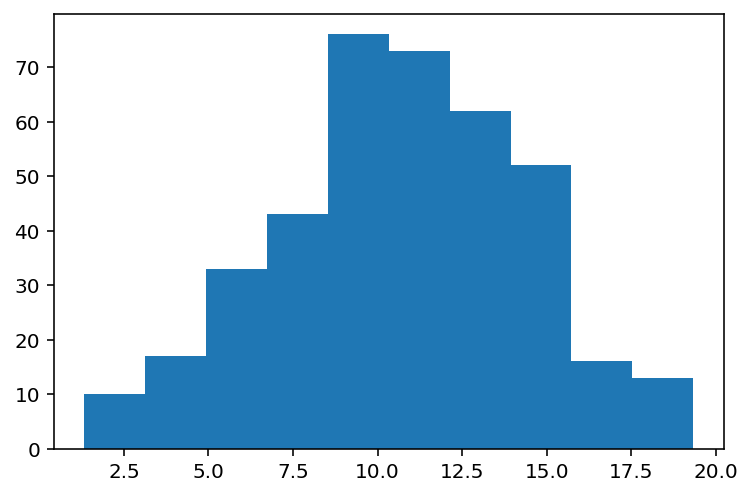

In [32]:
plt.hist(df.mean_periods)

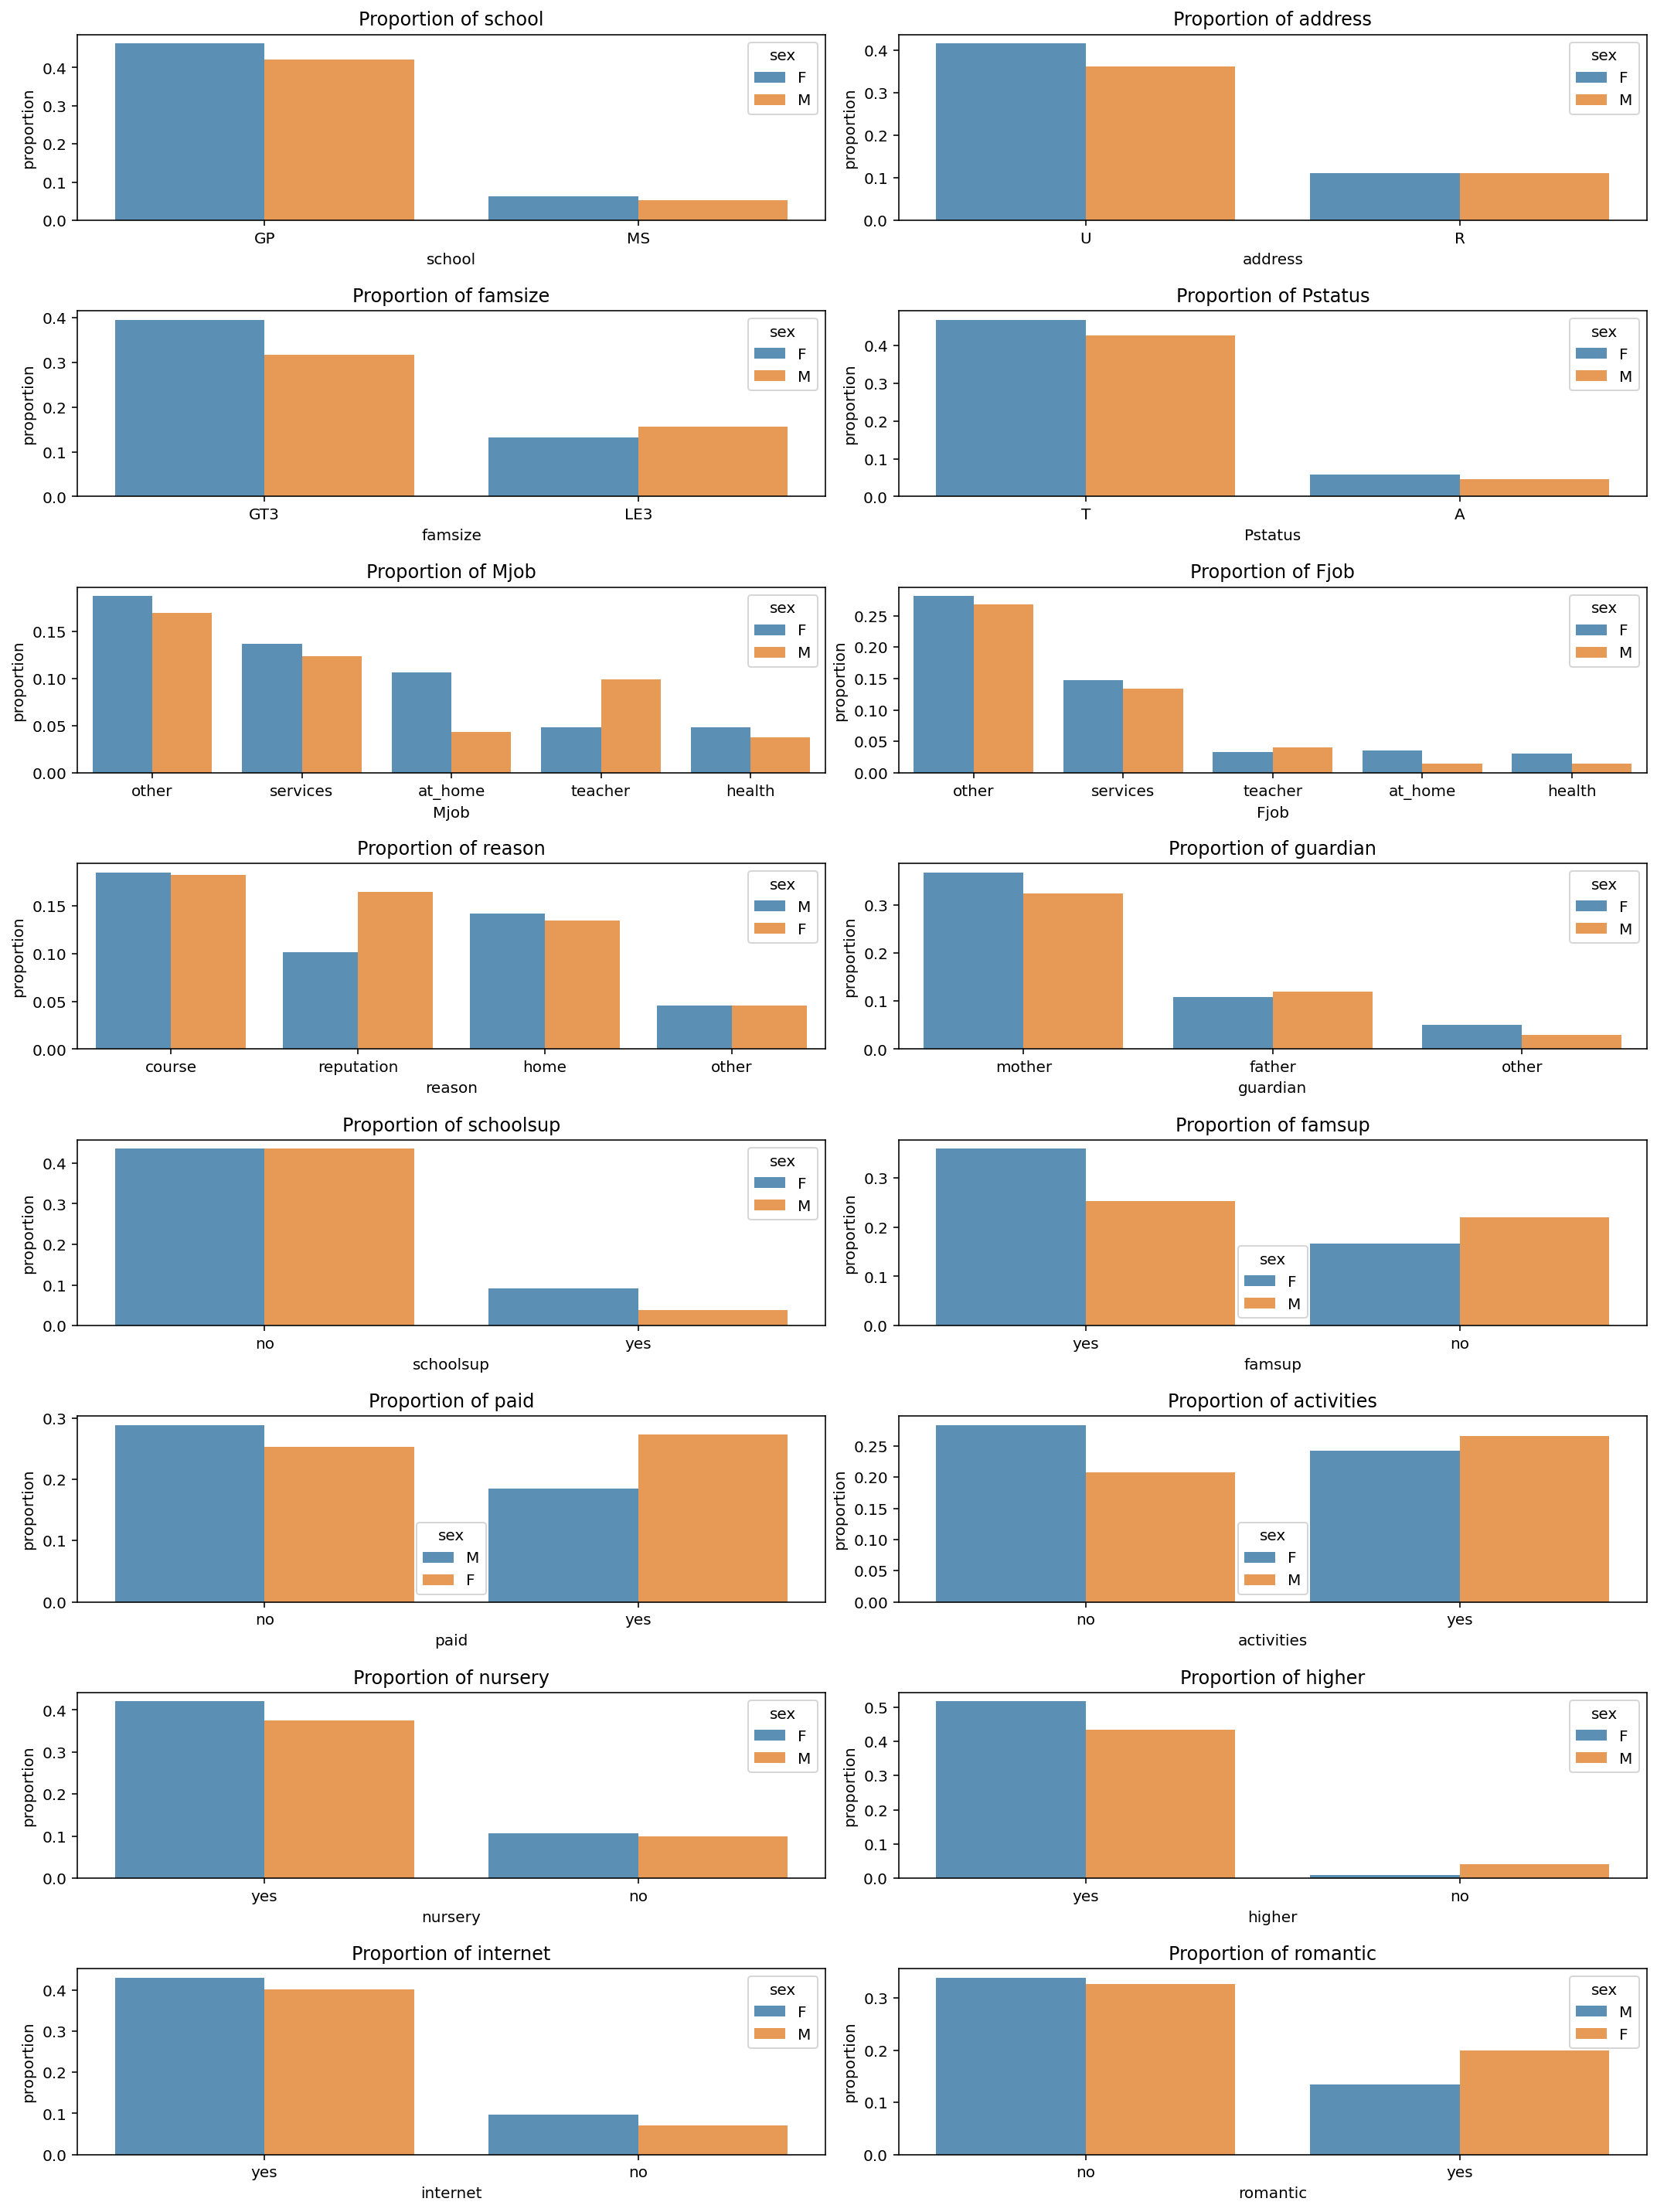

In [33]:
cols_obj = list(df.dtypes[df.dtypes == object].index[0:])
cols_obj.pop(1)
i=1
plt.figure(figsize=[15,20])
y, hue = 'proportion', 'sex'

for f in cols_obj:
    plt.subplot(8,2,i)
    df[[f, 'sex']]\
       .value_counts(normalize=True)\
       .rename(y)\
       .reset_index()\
       .pipe((sns.barplot, "data"), x=f, y='proportion', hue='sex', alpha=0.8)
    plt.title(f'Proportion of {f}')
    i+=1
plt.tight_layout()



In [34]:
cols_cont = [column for column in df.columns if column not in cols_obj and 
             column not in ['sex', 'Medu','Fedu','failures',]]

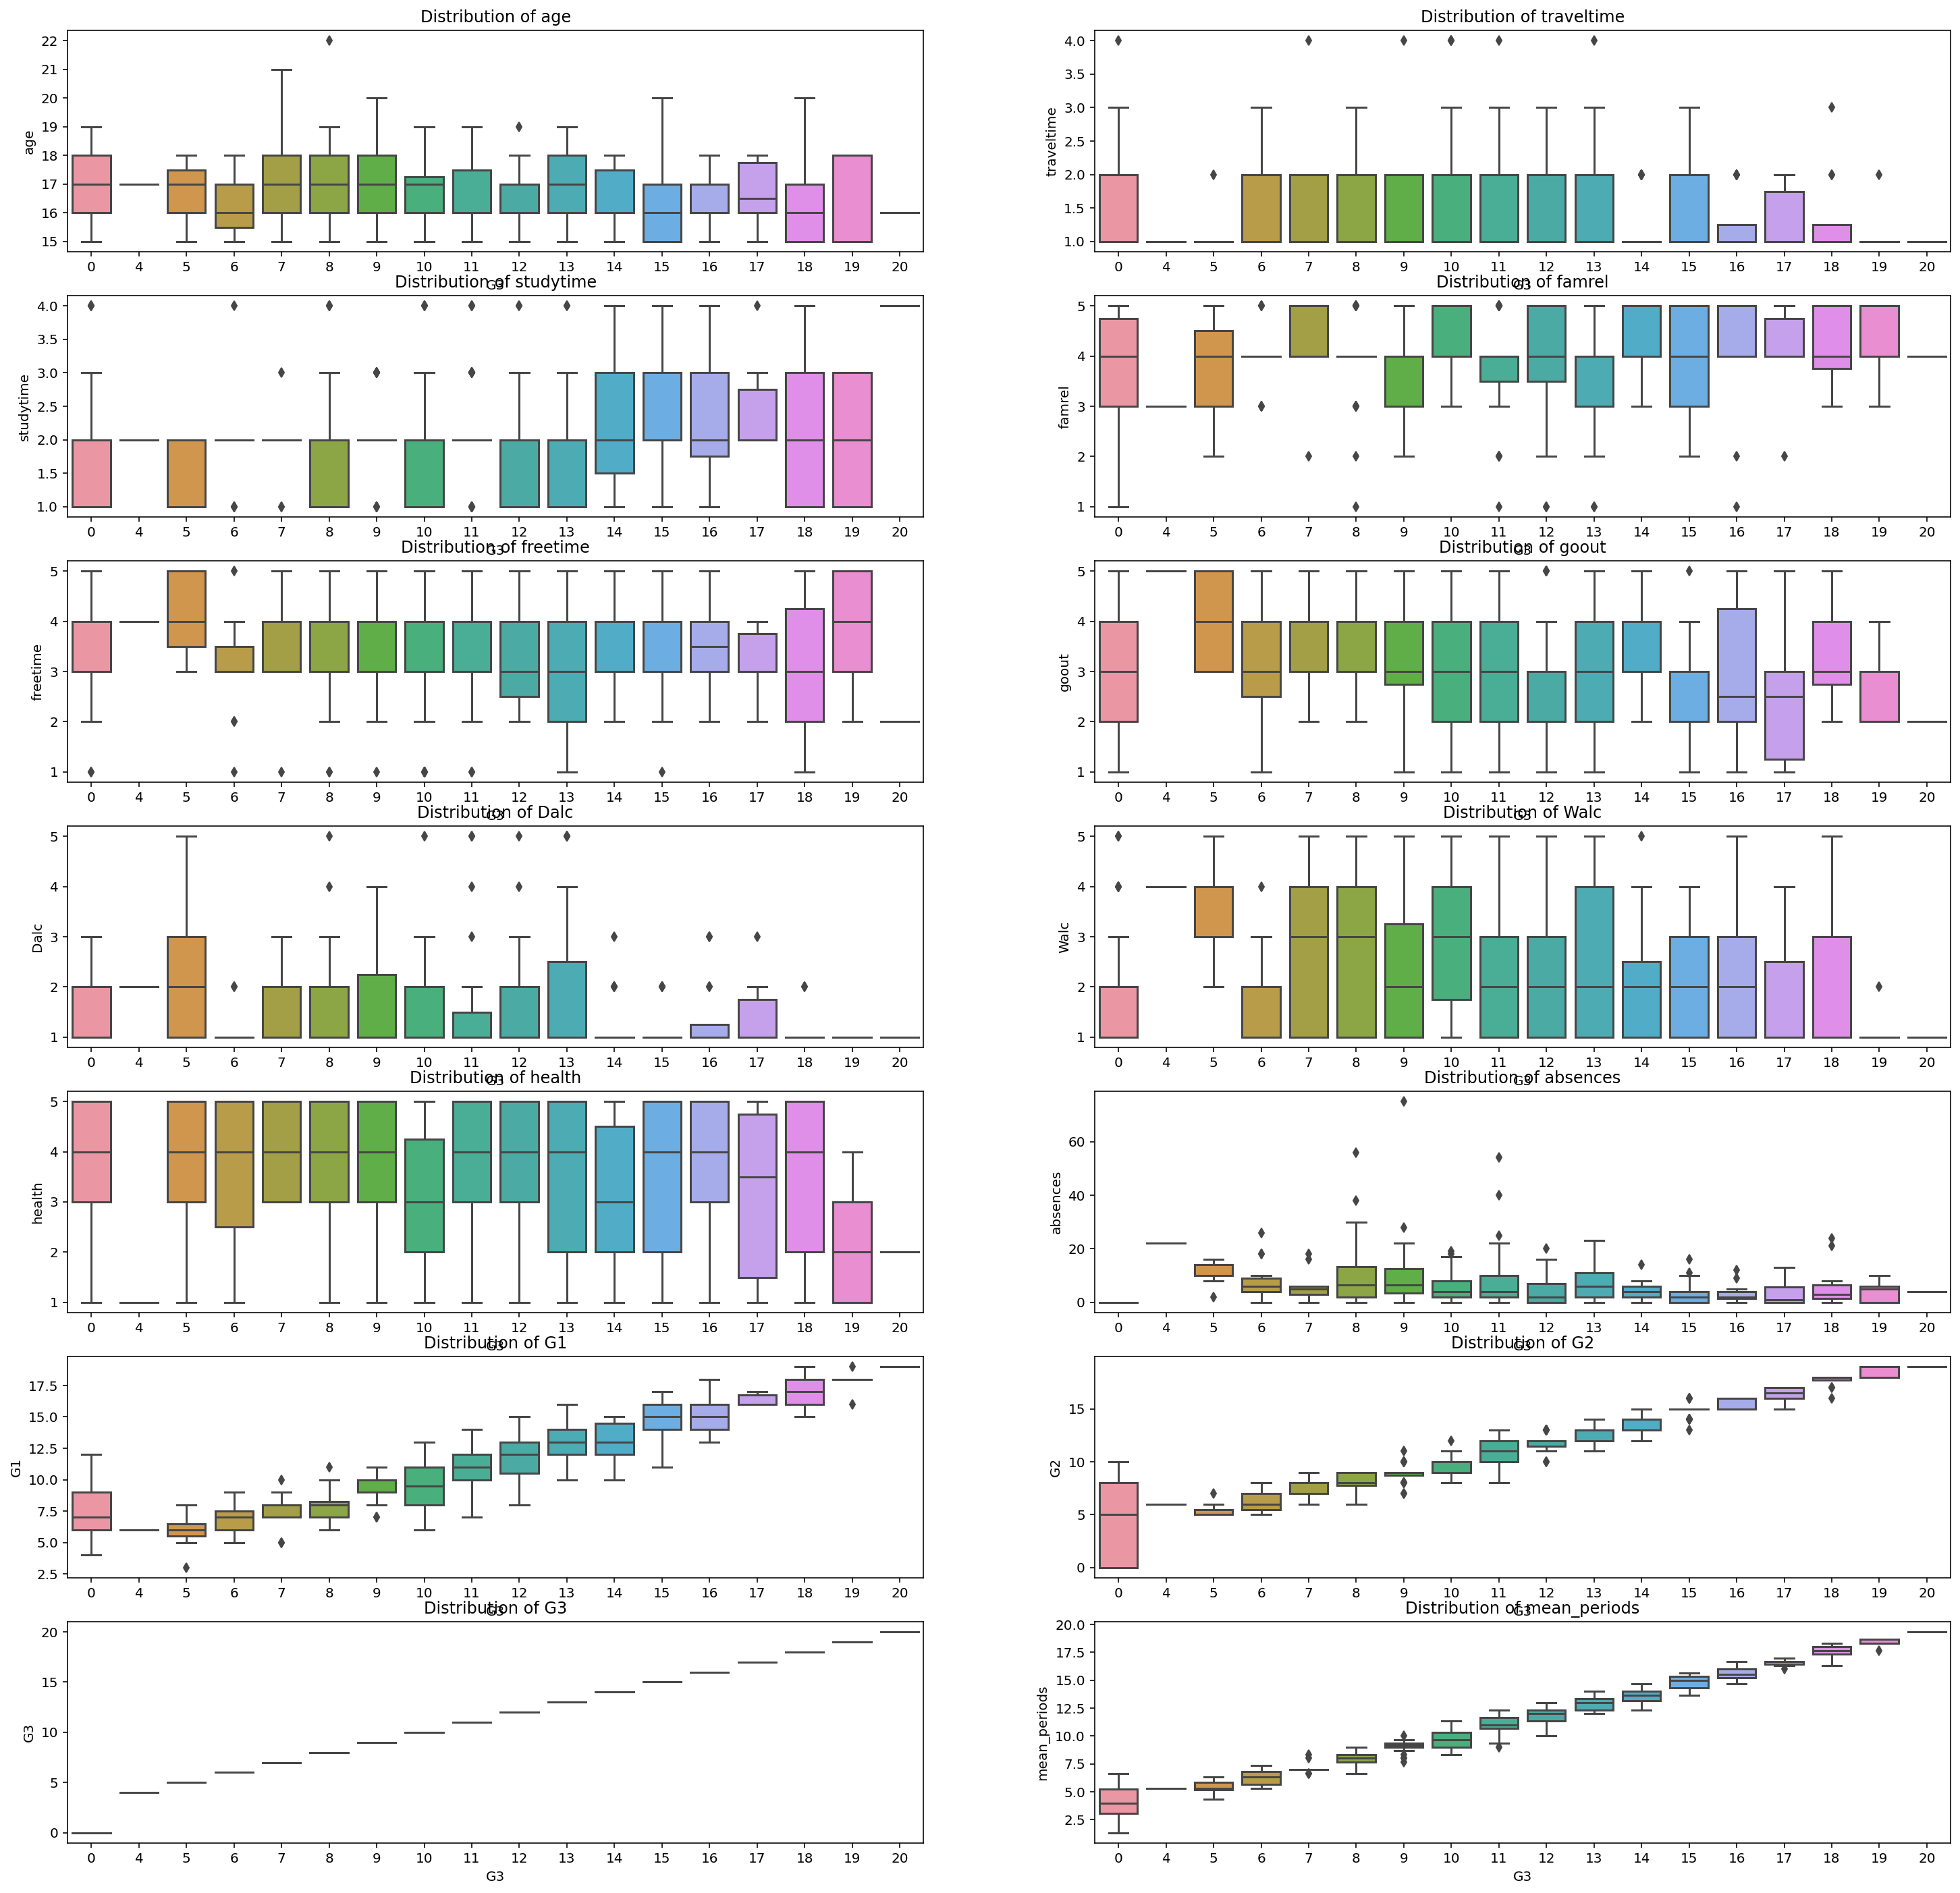

In [35]:
plt.figure(figsize=[25, 50])
i = 1

for x in cols_cont:
    plt.subplot(14,2,i)
    sns.boxplot(x='G3', y=x, data=df)
    i+=1
    plt.title(f'Distribution of {x}')

Boys spend less time on studying than girls

<AxesSubplot:xlabel='studytime', ylabel='mean_periods'>

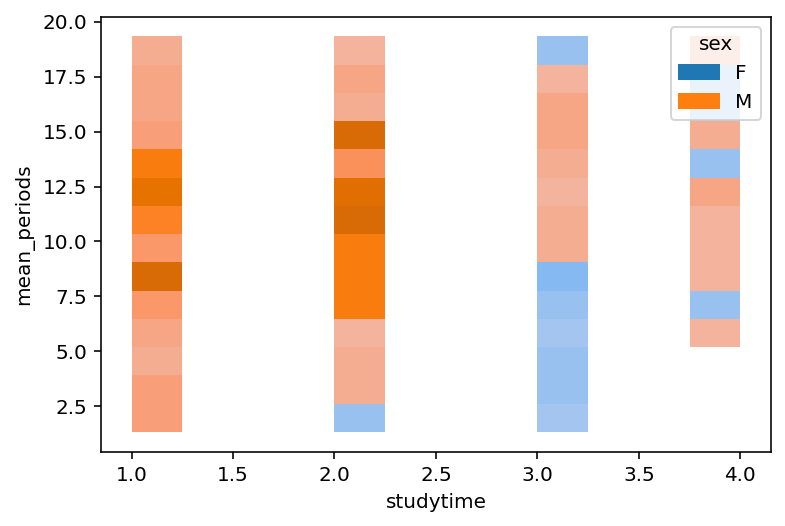

In [36]:
sns.histplot(data=df, x='studytime', y='mean_periods', hue='sex')

In general boys study better than girls

In [37]:
df.groupby('sex')['mean_periods'].mean()

sex
F    10.325321
M    11.073084
Name: mean_periods, dtype: float64

<AxesSubplot:xlabel='G3', ylabel='count'>

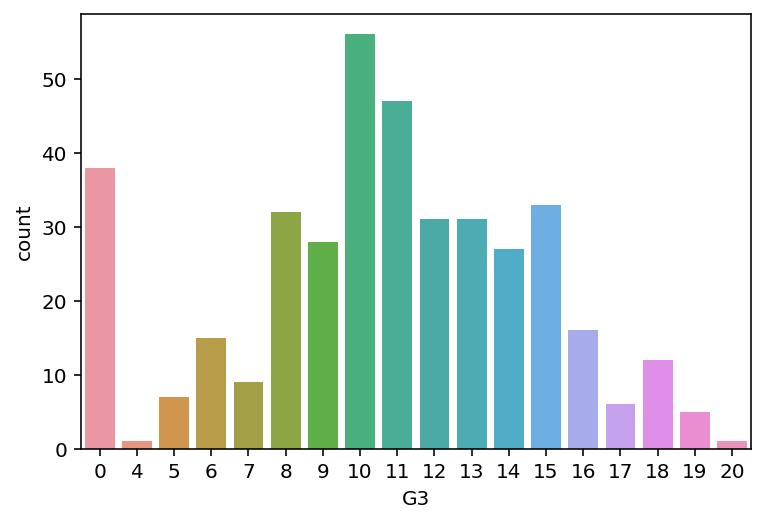

In [38]:
sns.countplot(data=df, x='G3')

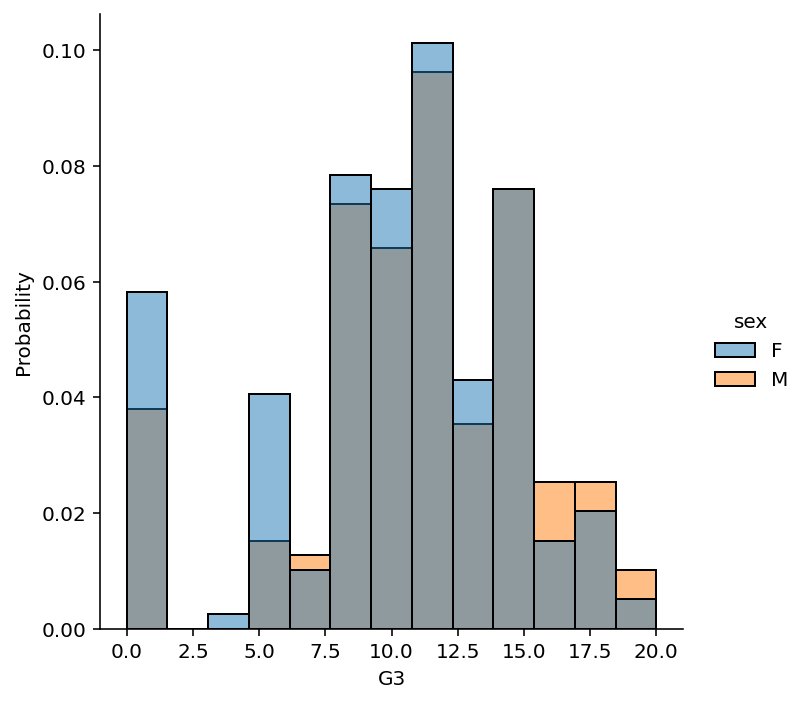

In [39]:
sns.displot(x='G3',
           hue='sex', 
           data=df,
           stat='probability')

Internet improves your marks!

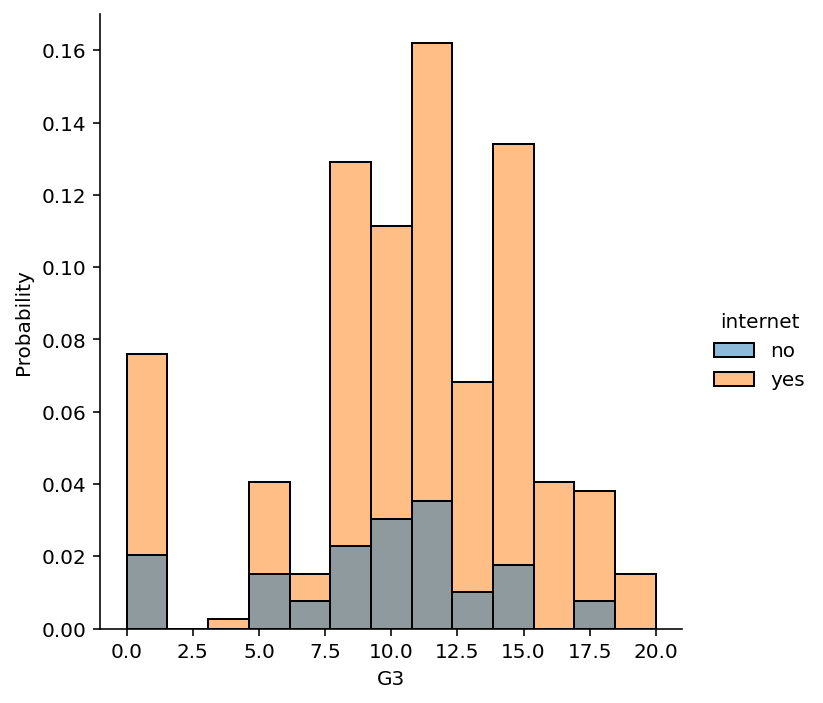

In [40]:
sns.displot(x='G3',
           hue='internet', 
           data=df,
           stat='probability')

Students who don't take paid classes have better marks

<AxesSubplot:xlabel='paid', ylabel='G3'>

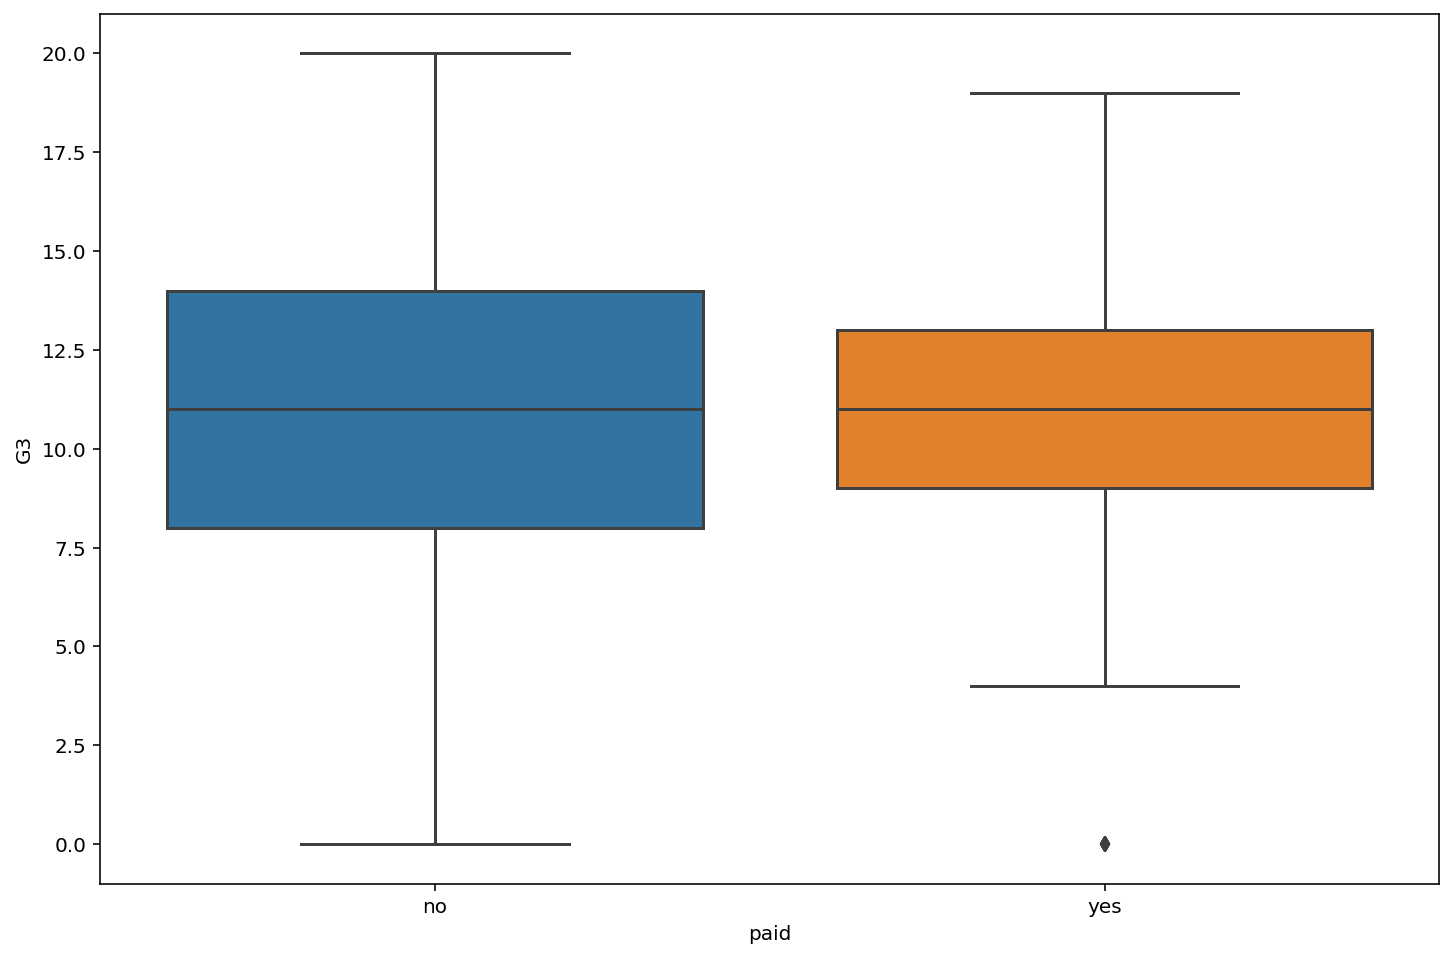

In [41]:
plt.figure(figsize=[12,8])
sns.boxplot(x='paid', y='G3', data=df)

Usually student's parents consume alcohol on weekends. But boys parents like to drink during workdays and parents of boys consume more alcohol in general

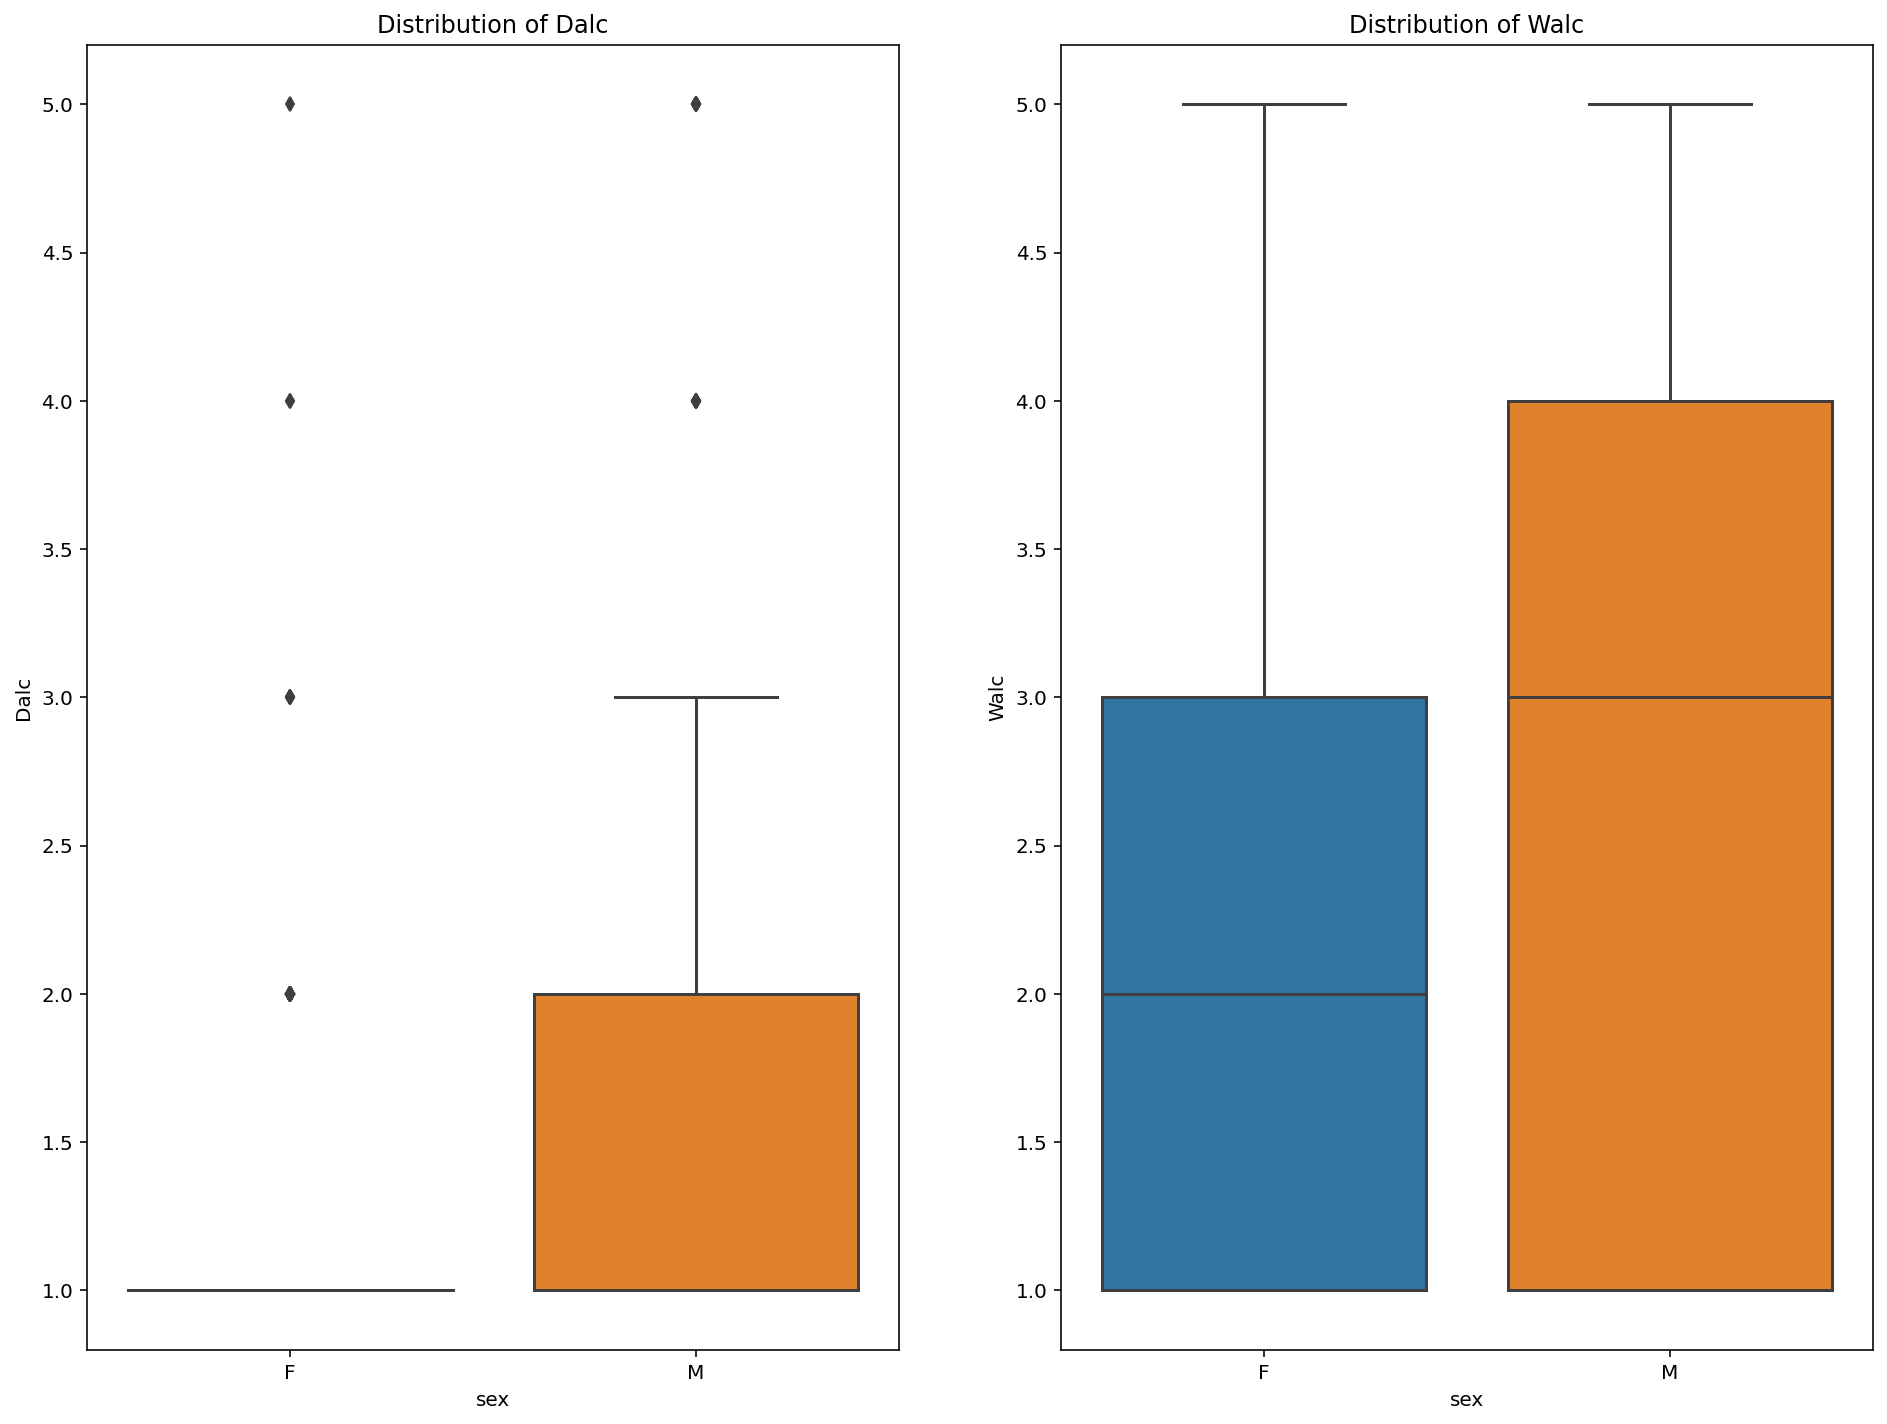

In [42]:
alco = ['Dalc', 'Walc']
plt.figure(figsize=[16,12])
i = 1

for x in alco:
    plt.subplot(1,2,i)
    sns.boxplot(x='sex', y=x, data=df)
    i+=1
    plt.title(f'Distribution of {x}')

<AxesSubplot:xlabel='absences', ylabel='count'>

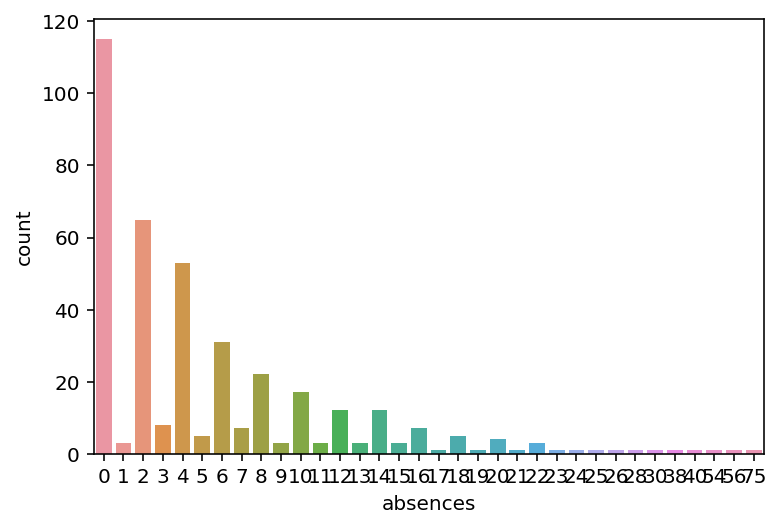

In [43]:
sns.countplot(df.absences)

Boys and Girls absence school identically. But among girls there are some outliers

<AxesSubplot:xlabel='sex', ylabel='absences'>

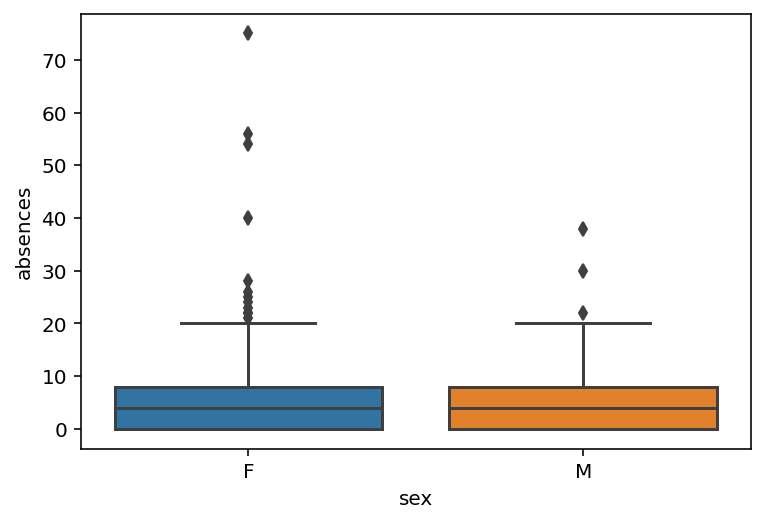

In [44]:
sns.boxplot(x='sex', y='absences', data=df)

In [45]:
cols_num = list(df.dtypes[df.dtypes == 'int64'].index[0:])

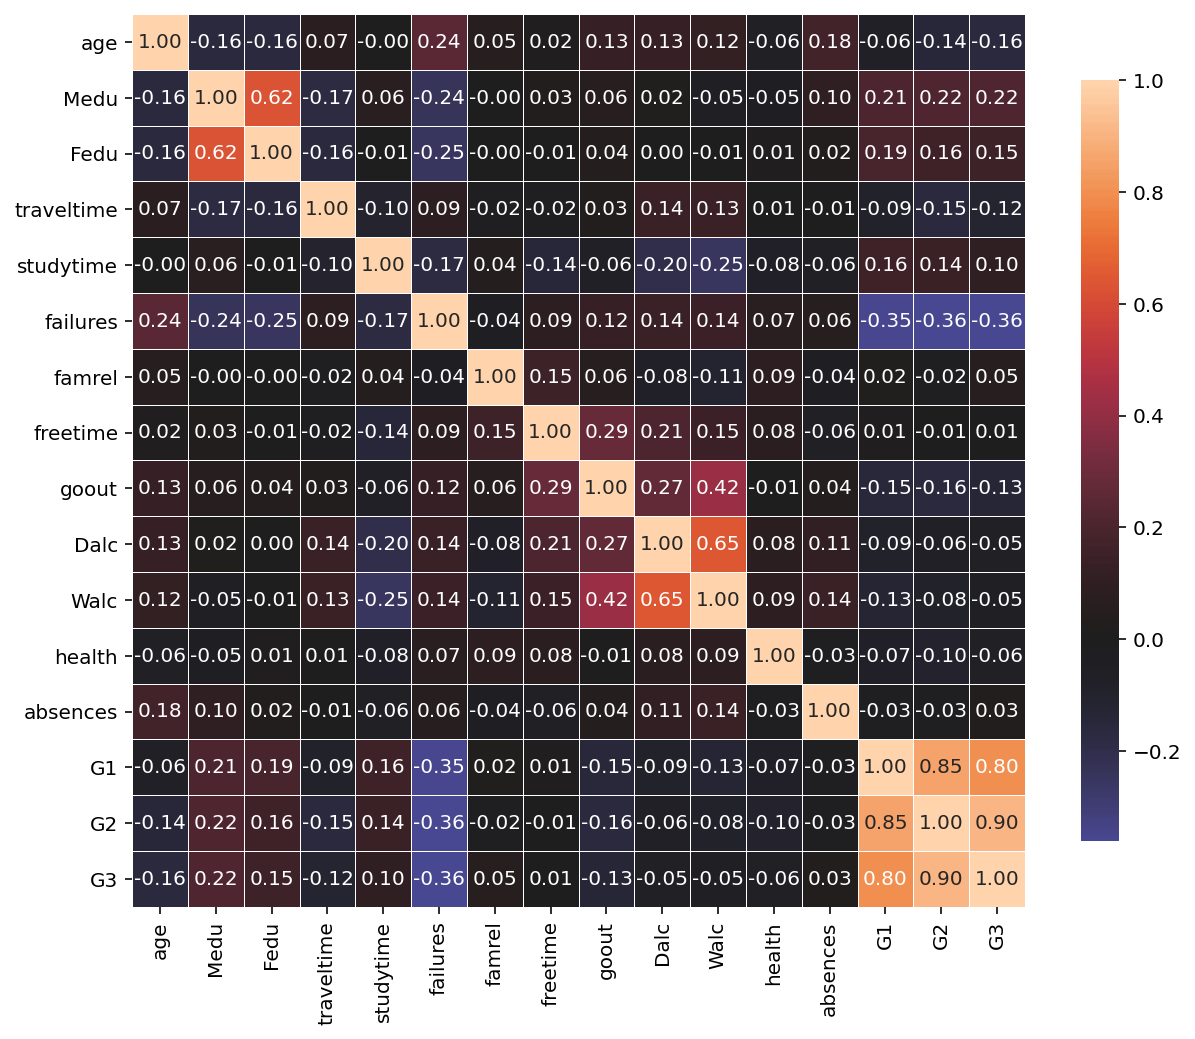

In [46]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df[cols_num])

From corr matrix we can see tha Fedu and Medu, goout and Walc, Walc and Dalc correlate a lot, we need to delete one of the pair to use in Learning models that can be affected by correlation.

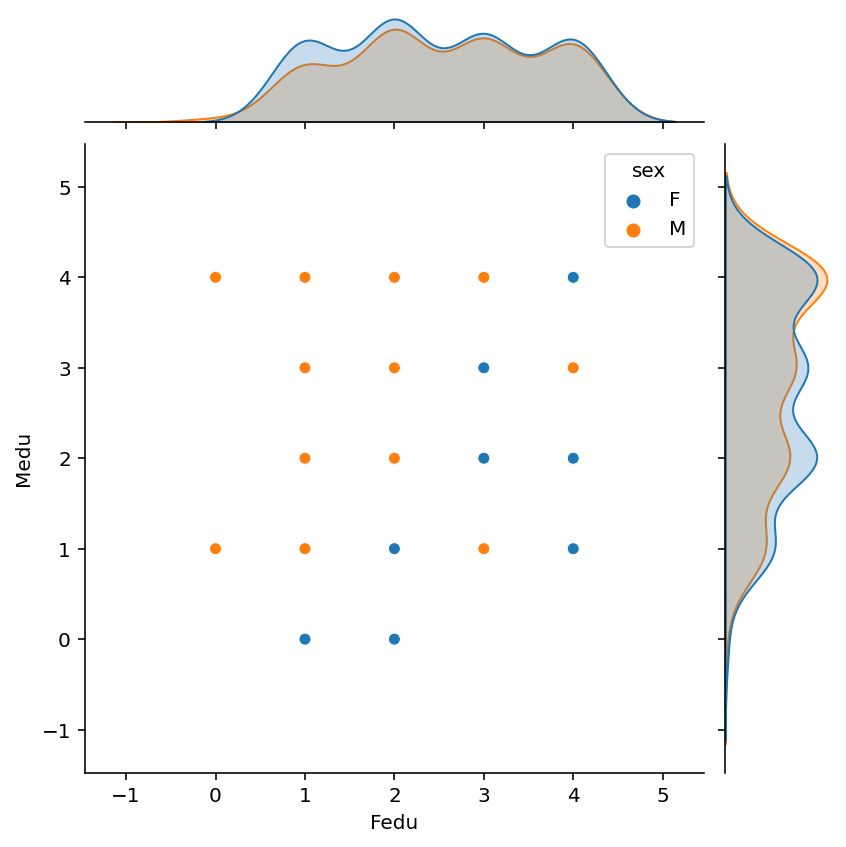

In [47]:
sns.jointplot(x='Fedu', y='Medu', 
              data=df, kind='scatter', hue='sex');

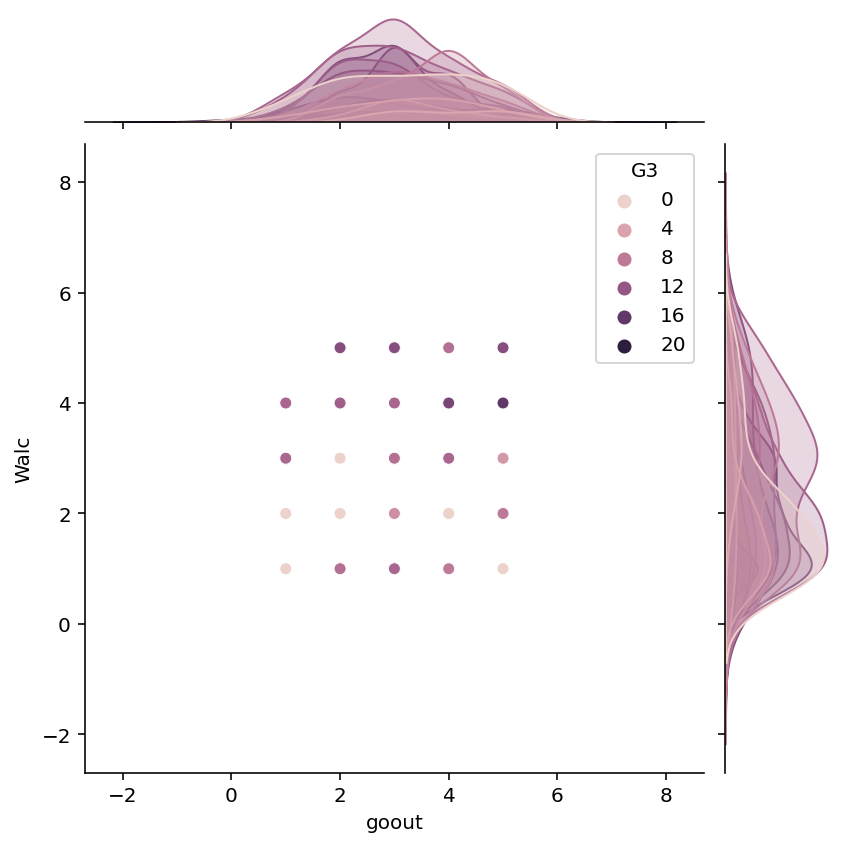

In [48]:
sns.jointplot(x='goout', y='Walc', 
              data=df, kind='scatter', hue='G3');

### Encoding variables

In [49]:
category_df = df.select_dtypes(include=['object'])

In [50]:
df_dummy = pd.get_dummies(category_df)

In [51]:
df_dummy['G3'] = df['G3']

Correlation of encoded variables

In [52]:
df_dummy.corr()['G3'].sort_values(ascending=False)

G3                   1.000000
higher_yes           0.182465
romantic_no          0.129970
Mjob_health          0.116158
address_U            0.105756
sex_M                0.103456
paid_yes             0.101996
internet_yes         0.098483
reason_reputation    0.095692
Fjob_teacher         0.095374
schoolsup_no         0.082788
famsize_LE3          0.081407
Mjob_services        0.078429
Pstatus_A            0.058009
Mjob_teacher         0.057712
Fjob_health          0.057111
reason_other         0.052008
nursery_yes          0.051568
school_GP            0.045017
famsup_no            0.039157
guardian_father      0.032493
guardian_mother      0.022338
activities_yes       0.016100
Fjob_at_home        -0.013385
activities_no       -0.016100
Fjob_services       -0.016108
reason_home         -0.021359
famsup_yes          -0.039157
school_MS           -0.045017
nursery_no          -0.051568
Fjob_other          -0.053483
Pstatus_T           -0.058009
famsize_GT3         -0.081407
schoolsup_

We drop G1 and G2 and school because they highly correlate with G3

In [53]:
y = df['G3']

X = df.drop(['G1', 'G2', 'mean_periods', 'school'], axis=1)

X = pd.get_dummies(X)

In [54]:
most_correlated = X.corr().abs()['G3'].sort_values(ascending=False)


In [55]:
most_correlated = most_correlated[:9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

In [56]:
X = X.loc[:, most_correlated.index]
X

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
0,6,0,4,1,0,18,4,4,1
1,6,0,1,1,0,17,1,3,1
2,10,3,1,1,0,15,1,2,1
3,15,0,4,1,0,15,2,2,0
4,10,0,3,1,0,16,3,2,1
...,...,...,...,...,...,...,...,...,...
390,9,2,2,1,0,20,2,4,1
391,16,0,3,1,0,17,1,5,1
392,7,3,1,1,0,21,1,3,1
393,10,0,3,1,0,18,2,1,1


**Students whose parents have better education score higher**

<AxesSubplot:xlabel='Medu', ylabel='G3'>

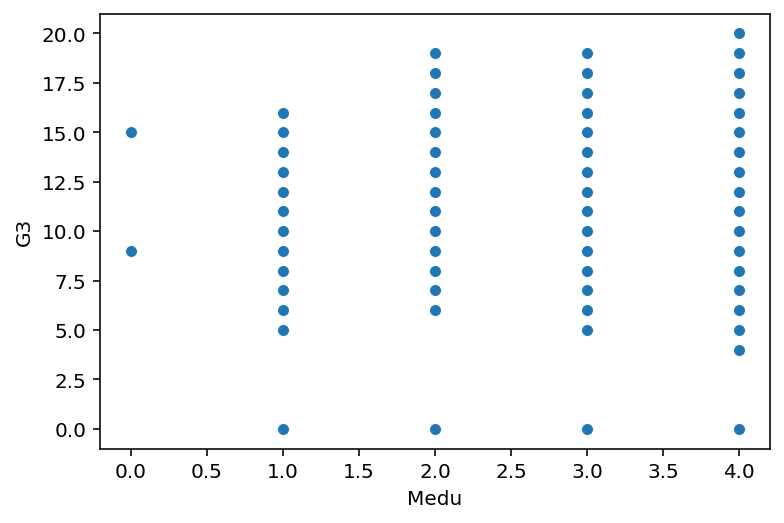

In [57]:
sns.scatterplot(x='Medu', y='G3', data=X)

<AxesSubplot:xlabel='Fedu', ylabel='G3'>

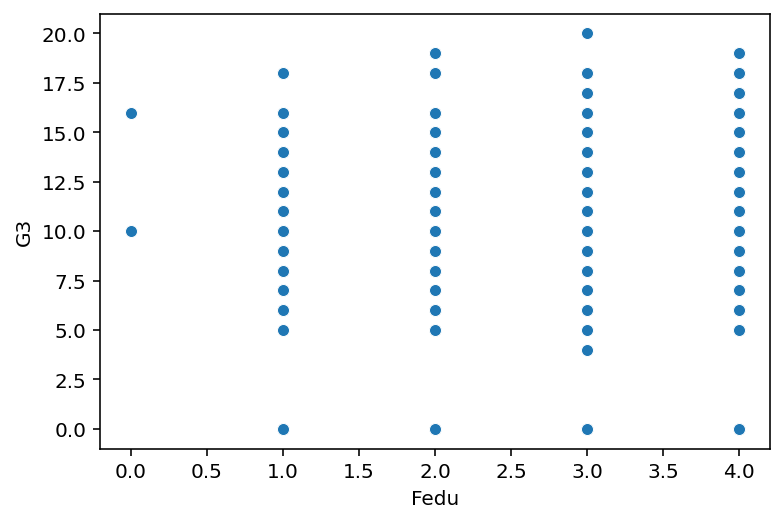

In [58]:
sns.scatterplot(x='Fedu', y='G3', data=X)

**Age does not affect score**

<AxesSubplot:xlabel='age', ylabel='G3'>

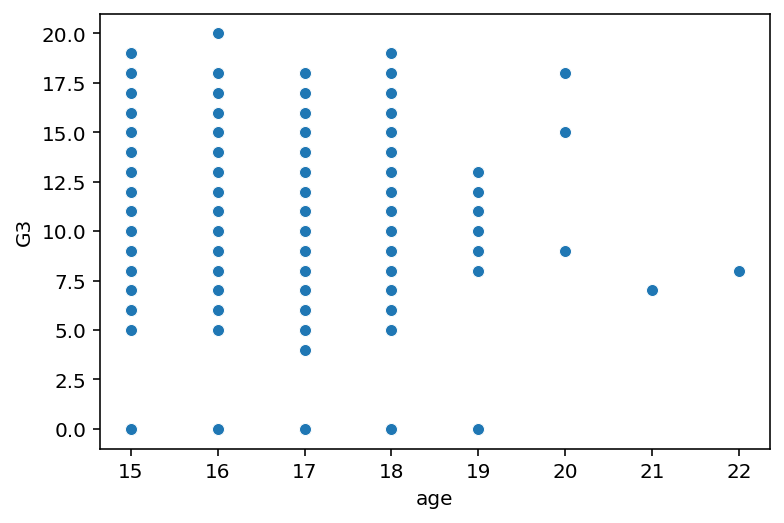

In [59]:
sns.scatterplot(data=X, x='age', y='G3')

**Students with less failures score more**

<AxesSubplot:xlabel='failures', ylabel='G3'>

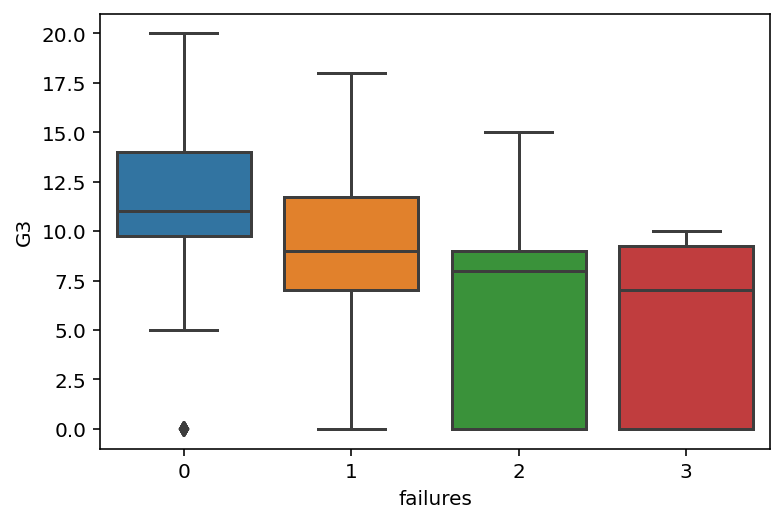

In [60]:
sns.boxplot(data=X, x='failures', y='G3')

**Students who go out less score better**

<AxesSubplot:xlabel='goout', ylabel='count'>

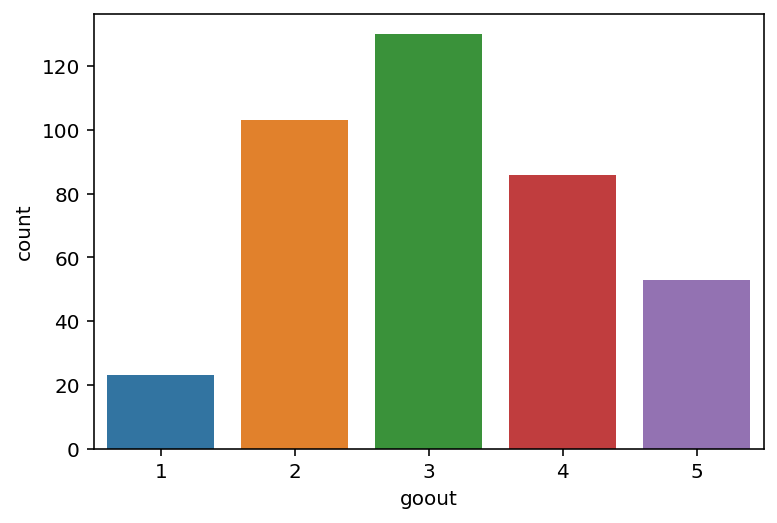

In [61]:
sns.countplot(data=X, x='goout')

<AxesSubplot:xlabel='goout', ylabel='G3'>

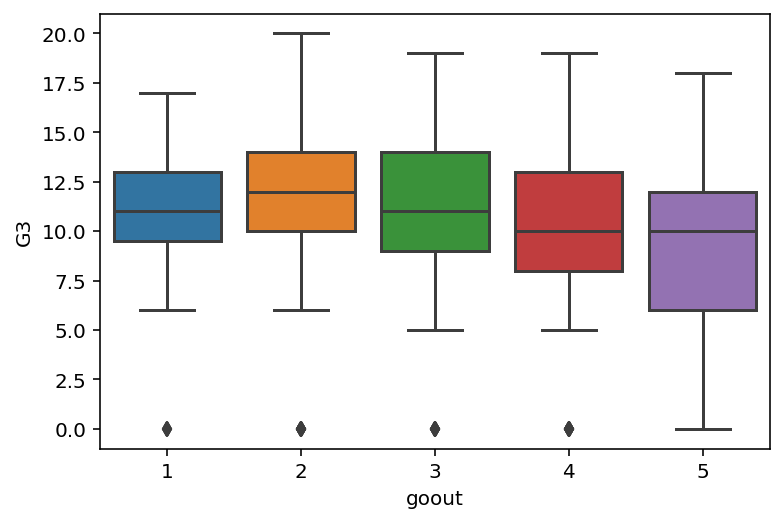

In [62]:
sns.boxplot(data=X, x='goout', y='G3')

**Students who want to take higher education score better**

<AxesSubplot:xlabel='higher_yes', ylabel='count'>

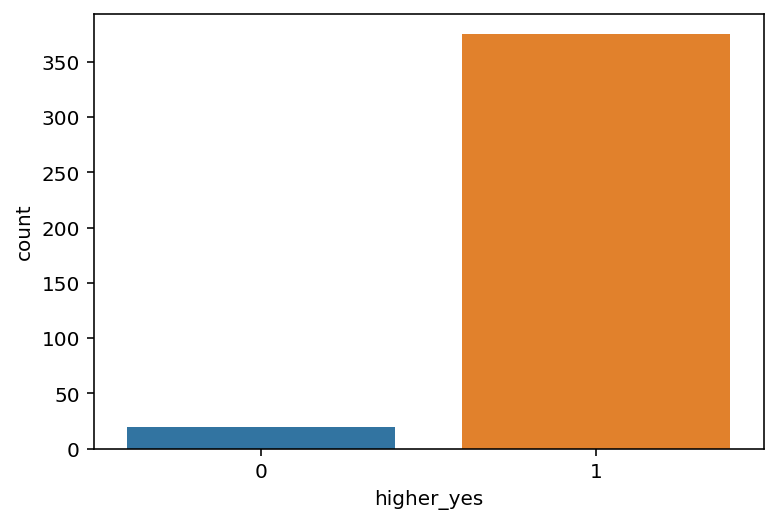

In [63]:
sns.countplot(data=X, x='higher_yes')

<AxesSubplot:xlabel='higher_yes', ylabel='G3'>

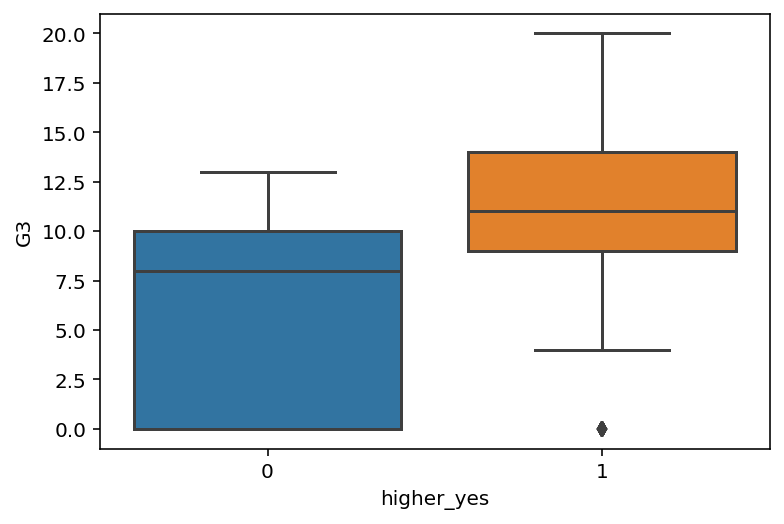

In [64]:
sns.boxplot(data=X, x='higher_yes', y='G3')

**Students who do not have romantic relat. score better**

<AxesSubplot:xlabel='romantic_no', ylabel='count'>

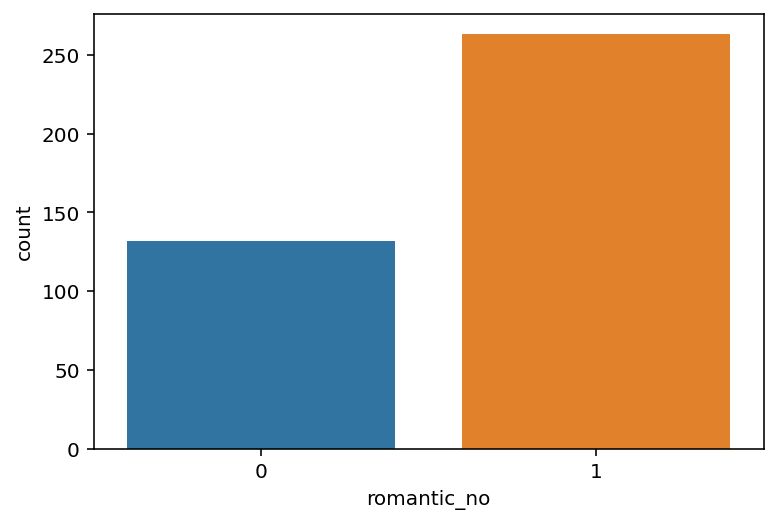

In [65]:
sns.countplot(data=X, x='romantic_no')

<AxesSubplot:xlabel='romantic_no', ylabel='G3'>

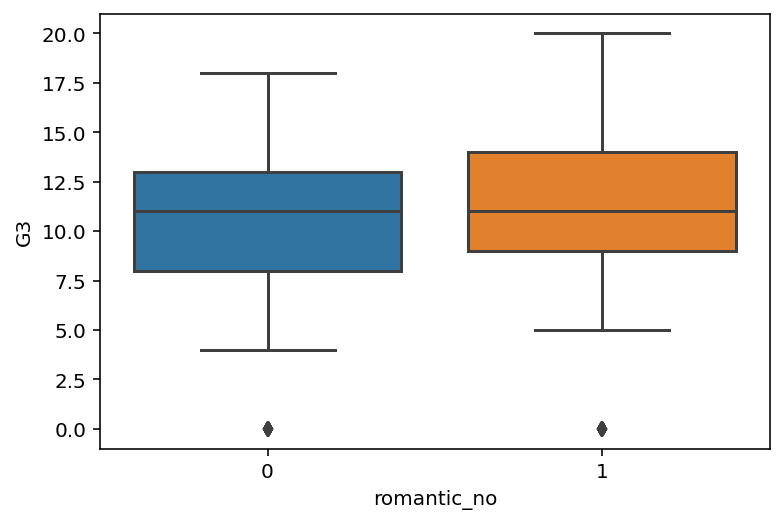

In [66]:
sns.boxplot(data=X, x='romantic_no', y='G3')

hypothesis:
Students who score high marks :
- parents have good education
- have <2 failures
- go out <= 3 times a week
- want to take higher education
- dont have romantic relationship 

### Modeling

Predicting G3 through regression

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=17)

In [68]:
X_train = X_train.drop('G3', axis=1)
X_test = X_test.drop('G3', axis=1)

In [69]:
models_df =  pd.DataFrame(columns=['mae', 'rmse', 'accuracy'])

In [70]:
def make_report(models_df, model, X_test, y_test, name):
    report = pd.DataFrame(columns={'mae'}, data=[0])
    
    report['mae'] = mean_absolute_error(y_test, model.predict(X_test).round())
    report['rmse'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test).round()))
    report['accuracy'] = accuracy_score(y_test, model.predict(X_test).round())
    
    report.index = [name]
    models_df = models_df.append(report)
    return models_df

**Raw Lofistic Regression**

In [71]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [72]:
models_df = make_report(models_df, lr, X_test, y_test, 'Logistic_regression')

In [73]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.10084


**LR GridSearchCV**

In [74]:
%%time
kf = KFold(n_splits=5,shuffle=True, random_state=17)
lr = LogisticRegression()
params = {
    'C': np.logspace(-6, 6, 100),
    'random_state': [17],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': range(100, 1001, 100),
}

lr_gs = GridSearchCV(lr, param_grid=params, cv=kf, verbose=True, n_jobs=-1)
lr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
CPU times: user 30.5 s, sys: 615 ms, total: 31.1 s
Wall time: 6min 22s


GridSearchCV(cv=KFold(n_splits=5, random_state=17, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-06,
       9.32603347e-06, 1.23284674e-05, 1.62975083e-05, 2.15443469e-05,
       2.84803587e-05, 3.76493581e-05, 4.97702356e-0...
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06]),
                         'max_iter': range(100, 1001, 100),
                         'random_state': [17],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=True)

In [75]:
lr_gs = lr_gs.best_estimator_


In [76]:
lr_gs.get_params()

{'C': 0.02310129700083158,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 17,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [77]:
models_df = make_report(models_df, lr_gs, X_test, y_test, 'Logistic_regression_GridSearchCV')

In [78]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857


**Linear Regression Raw**

In [79]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [80]:
models_df = make_report(models_df, linear, X_test, y_test, 'Linear_regression')

In [81]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857
Linear_regression,3.327731,4.338609,0.084034


**Random Forest Raw**

In [82]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
models_df = make_report(models_df, rf, X_test, y_test, 'RandomForest')

In [84]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857
Linear_regression,3.327731,4.338609,0.084034
RandomForest,3.823529,4.896406,0.084034


**Random Forest GridSearchCV**

In [85]:
%%time
kf = KFold(n_splits=3,shuffle=True, random_state=17)
rf = RandomForestRegressor()

params = {
    'n_estimators': range(100, 1001, 100),
    'max_depth': range(3,15),
    'min_samples_split': range(2, 6),
    'min_samples_leaf': range(1, 6),
    'random_state': [17]
}

rf_gs = GridSearchCV(rf, param_grid=params, verbose=True, cv=kf, n_jobs=-1)
rf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits
CPU times: user 49.2 s, sys: 1.17 s, total: 50.4 s
Wall time: 33min 48s


GridSearchCV(cv=KFold(n_splits=3, random_state=17, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 15),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6),
                         'n_estimators': range(100, 1001, 100),
                         'random_state': [17]},
             verbose=True)

In [86]:
rf_gs = rf_gs.best_estimator_

In [87]:
models_df = make_report(models_df, rf_gs, X_test, y_test, 'RandomForest_GridSearchCCV')

In [88]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857
Linear_regression,3.327731,4.338609,0.084034
RandomForest,3.823529,4.896406,0.084034
RandomForest_GridSearchCCV,3.462185,4.513286,0.067227


**Decision Tree Raw**

In [89]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [90]:
models_df = make_report(models_df, tree, X_test, y_test, 'Decision Tree')

In [91]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857
Linear_regression,3.327731,4.338609,0.084034
RandomForest,3.823529,4.896406,0.084034
RandomForest_GridSearchCCV,3.462185,4.513286,0.067227
Decision Tree,4.613445,5.931684,0.067227


**Decision Tree GridSearchCV**

In [92]:
%%time
kf = KFold(n_splits=3,shuffle=True, random_state=17)
tree = DecisionTreeRegressor()
params = {
    'criterion': ['mse', 'mae'],
    'max_depth': range(3,15),
    'min_samples_split': range(2, 6),
    'min_samples_leaf': range(1, 6),
}

tree_gs = GridSearchCV(tree, param_grid=params, cv=kf, verbose=2, n_jobs=-1)
tree_gs.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
CPU times: user 1.54 s, sys: 26.2 ms, total: 1.57 s
Wall time: 3.58 s


GridSearchCV(cv=KFold(n_splits=3, random_state=17, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(3, 15),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6)},
             verbose=2)

In [93]:
models_df = make_report(models_df, tree_gs, X_test, y_test, 'Decision_Tree_GridSearchCV')

In [94]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857
Linear_regression,3.327731,4.338609,0.084034
RandomForest,3.823529,4.896406,0.084034
RandomForest_GridSearchCCV,3.462185,4.513286,0.067227
Decision Tree,4.613445,5.931684,0.067227
Decision_Tree_GridSearchCV,3.436975,4.543903,0.100840


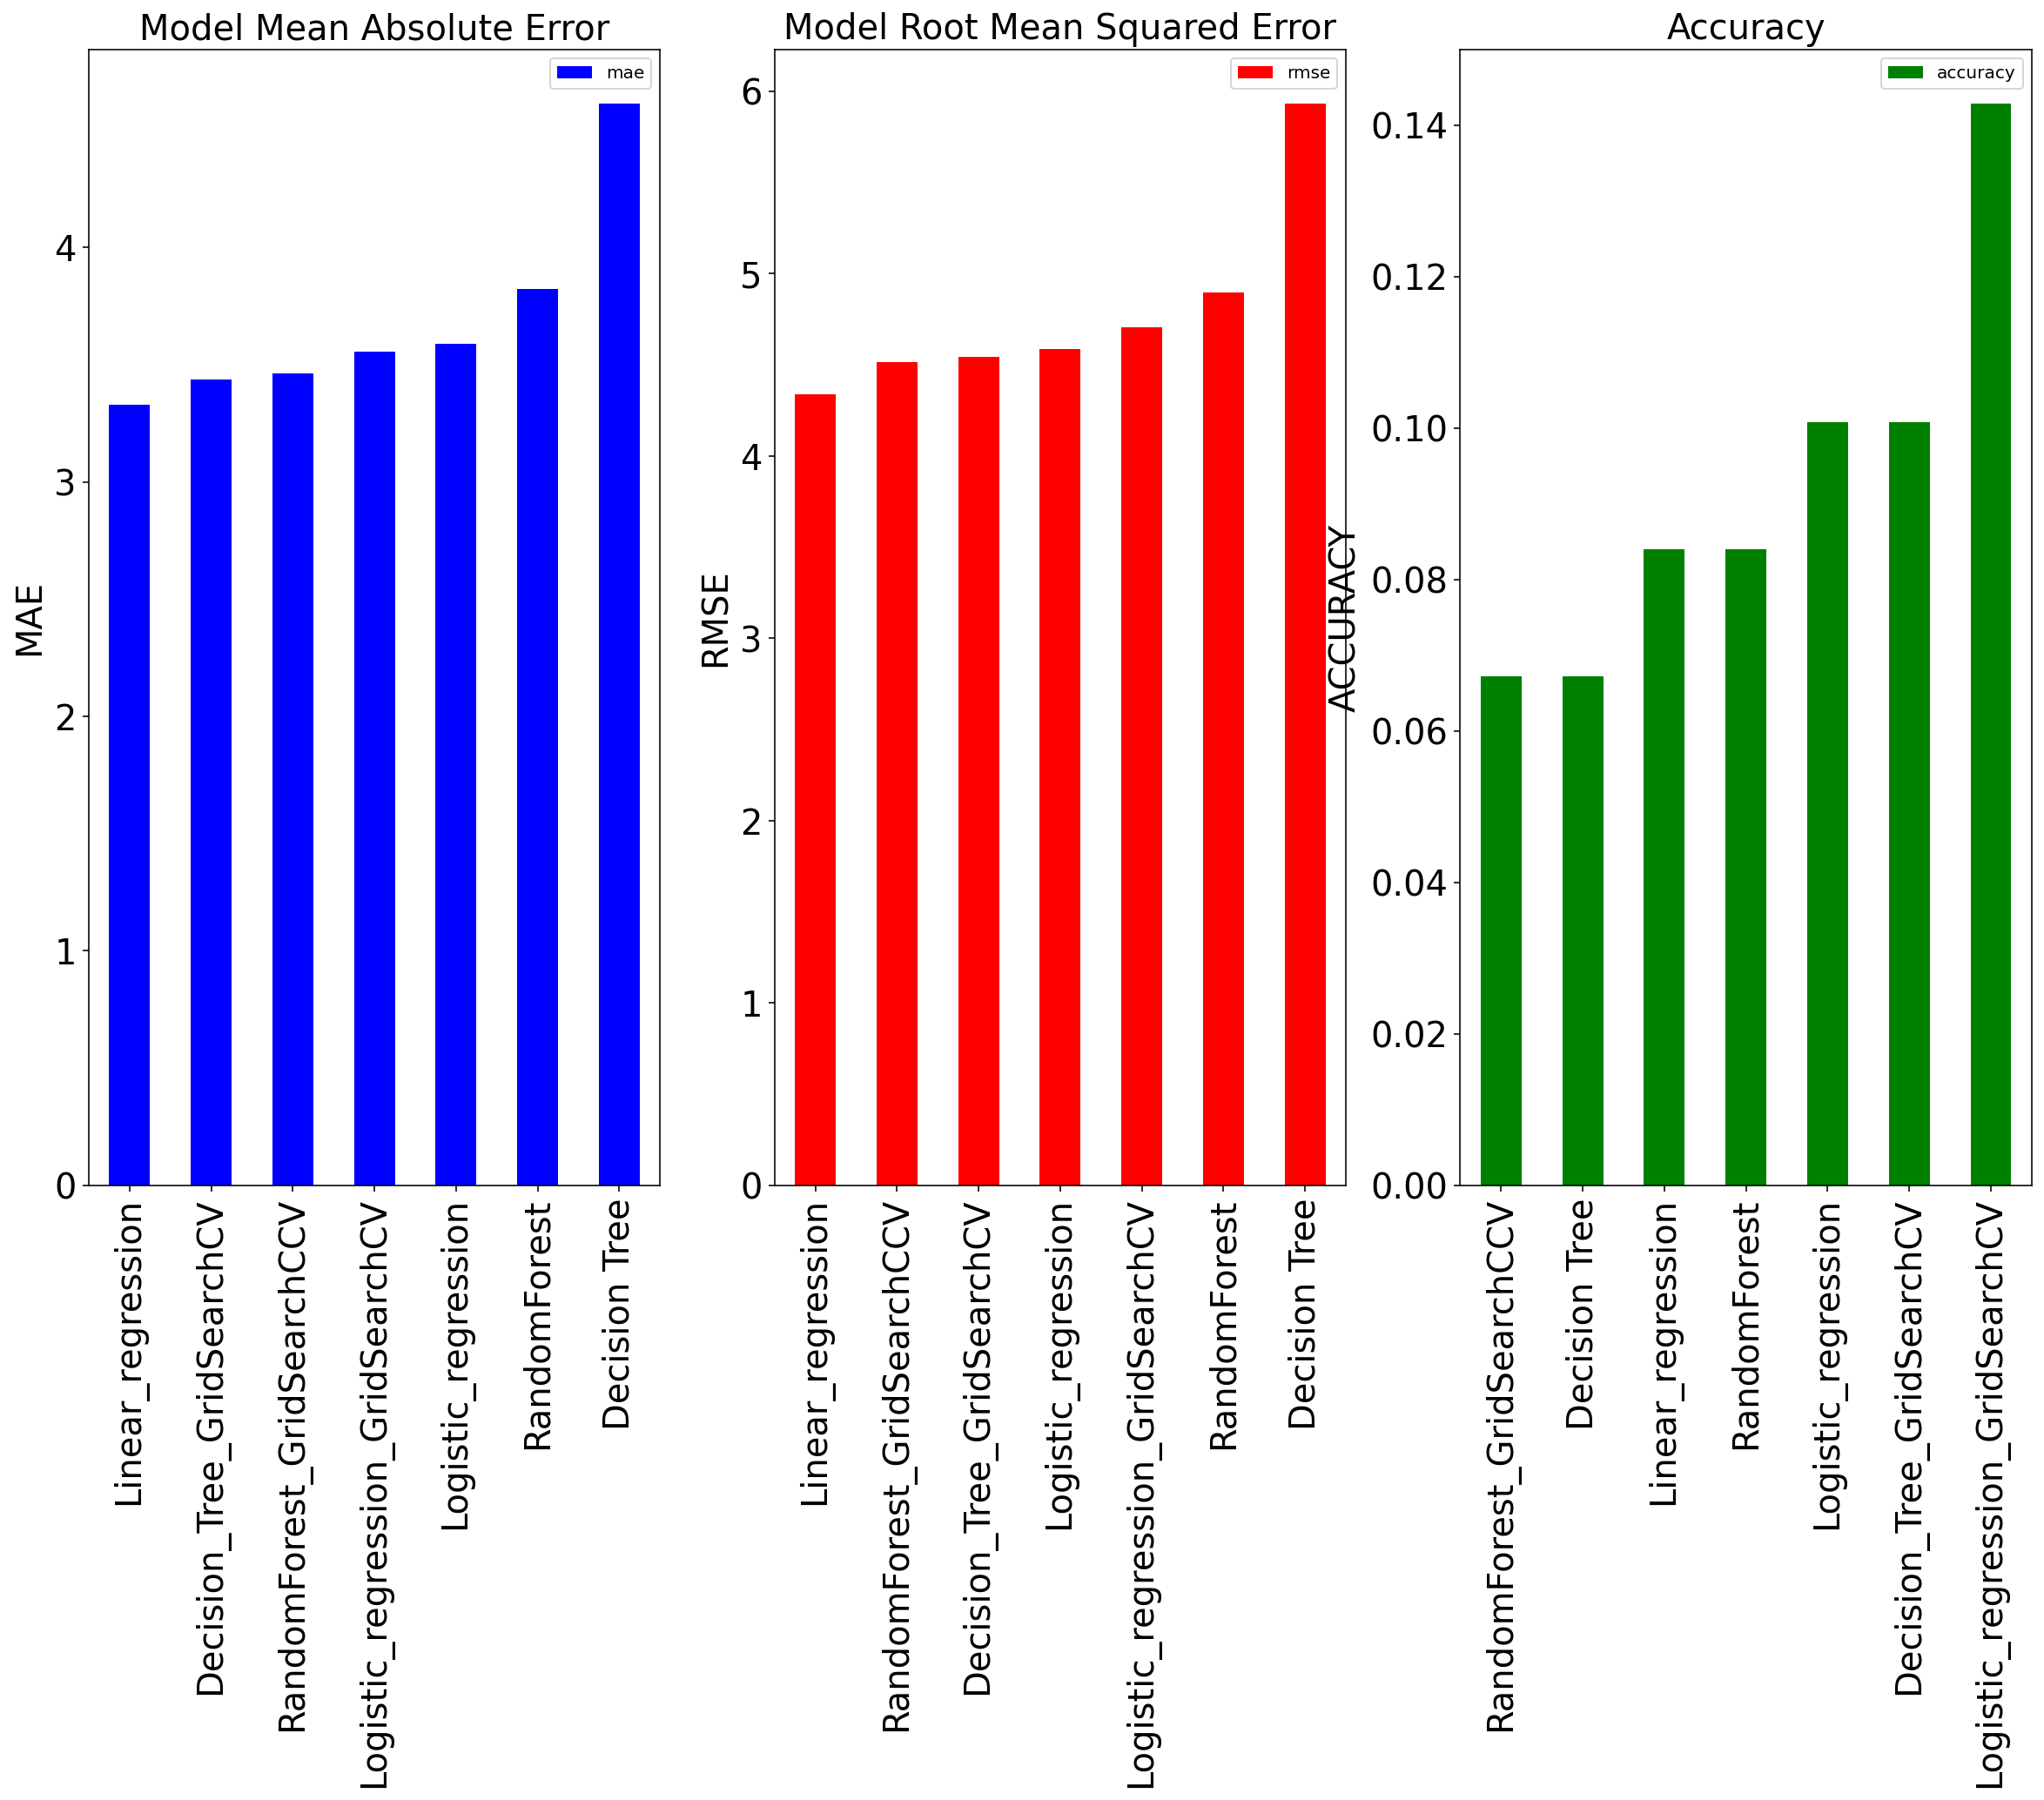

In [95]:
plt.figure(figsize=(20, 12))

# Root mean squared error
ax =  plt.subplot(1, 3, 1)
models_df.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20) 
plt.ylabel('MAE', fontsize=20)

# Median absolute percentage error
ax = plt.subplot(1, 3, 2)
models_df.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20) 
plt.ylabel('RMSE',fontsize=20)

ax = plt.subplot(1, 3, 3)
models_df.sort_values('accuracy', ascending = True).plot.bar(y = 'accuracy', color = 'g', ax = ax, fontsize=20)
plt.title('Accuracy', fontsize=20) 
plt.ylabel('ACCURACY',fontsize=20)

plt.show()

As we can see, on these features, Linear regression get the best MAE and RMSE, but the best accuracy is Logistic regression with tunned params.

**Let's see what results we will get if we use all features, except G1 and G2**

### Modeling with all features

In [96]:
X_all = df.drop(['G1', 'G2', 'G3', 'mean_periods'], axis = 1)

**Scaled features**

In [97]:
X_scaled = X_all

In [98]:
X_scaled[['age', 'absences']] = MinMaxScaler(feature_range=(1,4)).fit_transform(X_all[['age', 'absences']])

In [99]:
X_scaled = pd.get_dummies(X_scaled)

In [100]:
X_scaled

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,2.285714,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,1.857143,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,1.000000,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,1.000000,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,1.428571,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,3.142857,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,1.857143,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,3.571429,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,2.285714,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


In [101]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=.3, random_state=17)

**Logistic Regression**

In [102]:
params = {'C': 0.02310129700083158,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 17,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False
}

lr = LogisticRegression(**params)
lr.fit(X_train_scaled, y_train_scaled)

LogisticRegression(C=0.02310129700083158, random_state=17)

In [103]:
models_df = make_report(models_df, lr, X_test_scaled, y_test_scaled, 'Logistic_regression_all_scaled')

In [104]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857
Linear_regression,3.327731,4.338609,0.084034
RandomForest,3.823529,4.896406,0.084034
RandomForest_GridSearchCCV,3.462185,4.513286,0.067227
Decision Tree,4.613445,5.931684,0.067227
Decision_Tree_GridSearchCV,3.436975,4.543903,0.100840
Logistic_regression_all_scaled,3.042017,4.170726,0.176471


**Linear Regression All scaled**

In [105]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [106]:
models_df = make_report(models_df, linear, X_test_scaled, y_test_scaled, 'Linear_regression_all_scaled')

In [107]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857
Linear_regression,3.327731,4.338609,0.084034
RandomForest,3.823529,4.896406,0.084034
RandomForest_GridSearchCCV,3.462185,4.513286,0.067227
Decision Tree,4.613445,5.931684,0.067227
Decision_Tree_GridSearchCV,3.436975,4.543903,0.100840
Logistic_regression_all_scaled,3.042017,4.170726,0.176471
Linear_regression_all_scaled,3.613445,4.681449,0.084034


**Unscaled features**

In [108]:
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(pd.get_dummies(X_all), y, test_size=.3, random_state=42)

**Logistic Regression**

In [109]:
params = {'C': 0.02310129700083158,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 17,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False
}

lr = LogisticRegression(**params)
lr.fit(X_train_unscaled, y_train_unscaled)

LogisticRegression(C=0.02310129700083158, random_state=17)

In [110]:
models_df = make_report(models_df, lr, X_test_unscaled, y_test_unscaled, 'Logistic_regression_all_unscaled')

In [111]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857
Linear_regression,3.327731,4.338609,0.084034
RandomForest,3.823529,4.896406,0.084034
RandomForest_GridSearchCCV,3.462185,4.513286,0.067227
Decision Tree,4.613445,5.931684,0.067227
Decision_Tree_GridSearchCV,3.436975,4.543903,0.100840
Logistic_regression_all_scaled,3.042017,4.170726,0.176471
Linear_regression_all_scaled,3.613445,4.681449,0.084034
Logistic_regression_all_unscaled,4.067227,5.267627,0.126050


**Linear regression**

In [112]:
linear = LinearRegression()
linear.fit(X_train_unscaled, y_train_unscaled)

LinearRegression()

In [113]:
models_df = make_report(models_df, linear, X_test_unscaled, y_test_unscaled, 'Linear_regression_all_unscaled')

In [114]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857
Linear_regression,3.327731,4.338609,0.084034
RandomForest,3.823529,4.896406,0.084034
RandomForest_GridSearchCCV,3.462185,4.513286,0.067227
Decision Tree,4.613445,5.931684,0.067227
Decision_Tree_GridSearchCV,3.436975,4.543903,0.100840
Logistic_regression_all_scaled,3.042017,4.170726,0.176471
Linear_regression_all_scaled,3.613445,4.681449,0.084034
Logistic_regression_all_unscaled,4.067227,5.267627,0.126050


**We've got different answers. Maybe it is because of seed, let's set seed to 17**

**Unscaled features(with same seed as scaled)**

In [115]:
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(pd.get_dummies(X_all), y, test_size=.3, random_state=17)

**Logistic Regression**

In [116]:
params = {'C': 0.02310129700083158,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 17,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False
}

lr = LogisticRegression(**params)
lr.fit(X_train_unscaled, y_train_unscaled)

LogisticRegression(C=0.02310129700083158, random_state=17)

In [117]:
models_df = make_report(models_df, lr, X_test_unscaled, y_test_unscaled, 'Logistic_regression_all_unscaled_same_seed')

In [118]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857
Linear_regression,3.327731,4.338609,0.084034
RandomForest,3.823529,4.896406,0.084034
RandomForest_GridSearchCCV,3.462185,4.513286,0.067227
Decision Tree,4.613445,5.931684,0.067227
Decision_Tree_GridSearchCV,3.436975,4.543903,0.100840
Logistic_regression_all_scaled,3.042017,4.170726,0.176471
Linear_regression_all_scaled,3.613445,4.681449,0.084034
Logistic_regression_all_unscaled,4.067227,5.267627,0.126050


**Linear regression**

In [119]:
linear = LinearRegression()
linear.fit(X_train_unscaled, y_train_unscaled)

LinearRegression()

In [120]:
models_df = make_report(models_df, linear, X_test_unscaled, y_test_unscaled, 'Linear_regression_all_unscaled_same_seed')

In [121]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.588235,4.586242,0.100840
Logistic_regression_GridSearchCV,3.554622,4.705620,0.142857
Linear_regression,3.327731,4.338609,0.084034
RandomForest,3.823529,4.896406,0.084034
RandomForest_GridSearchCCV,3.462185,4.513286,0.067227
Decision Tree,4.613445,5.931684,0.067227
Decision_Tree_GridSearchCV,3.436975,4.543903,0.100840
Logistic_regression_all_scaled,3.042017,4.170726,0.176471
Linear_regression_all_scaled,3.613445,4.681449,0.084034
Logistic_regression_all_unscaled,4.067227,5.267627,0.126050


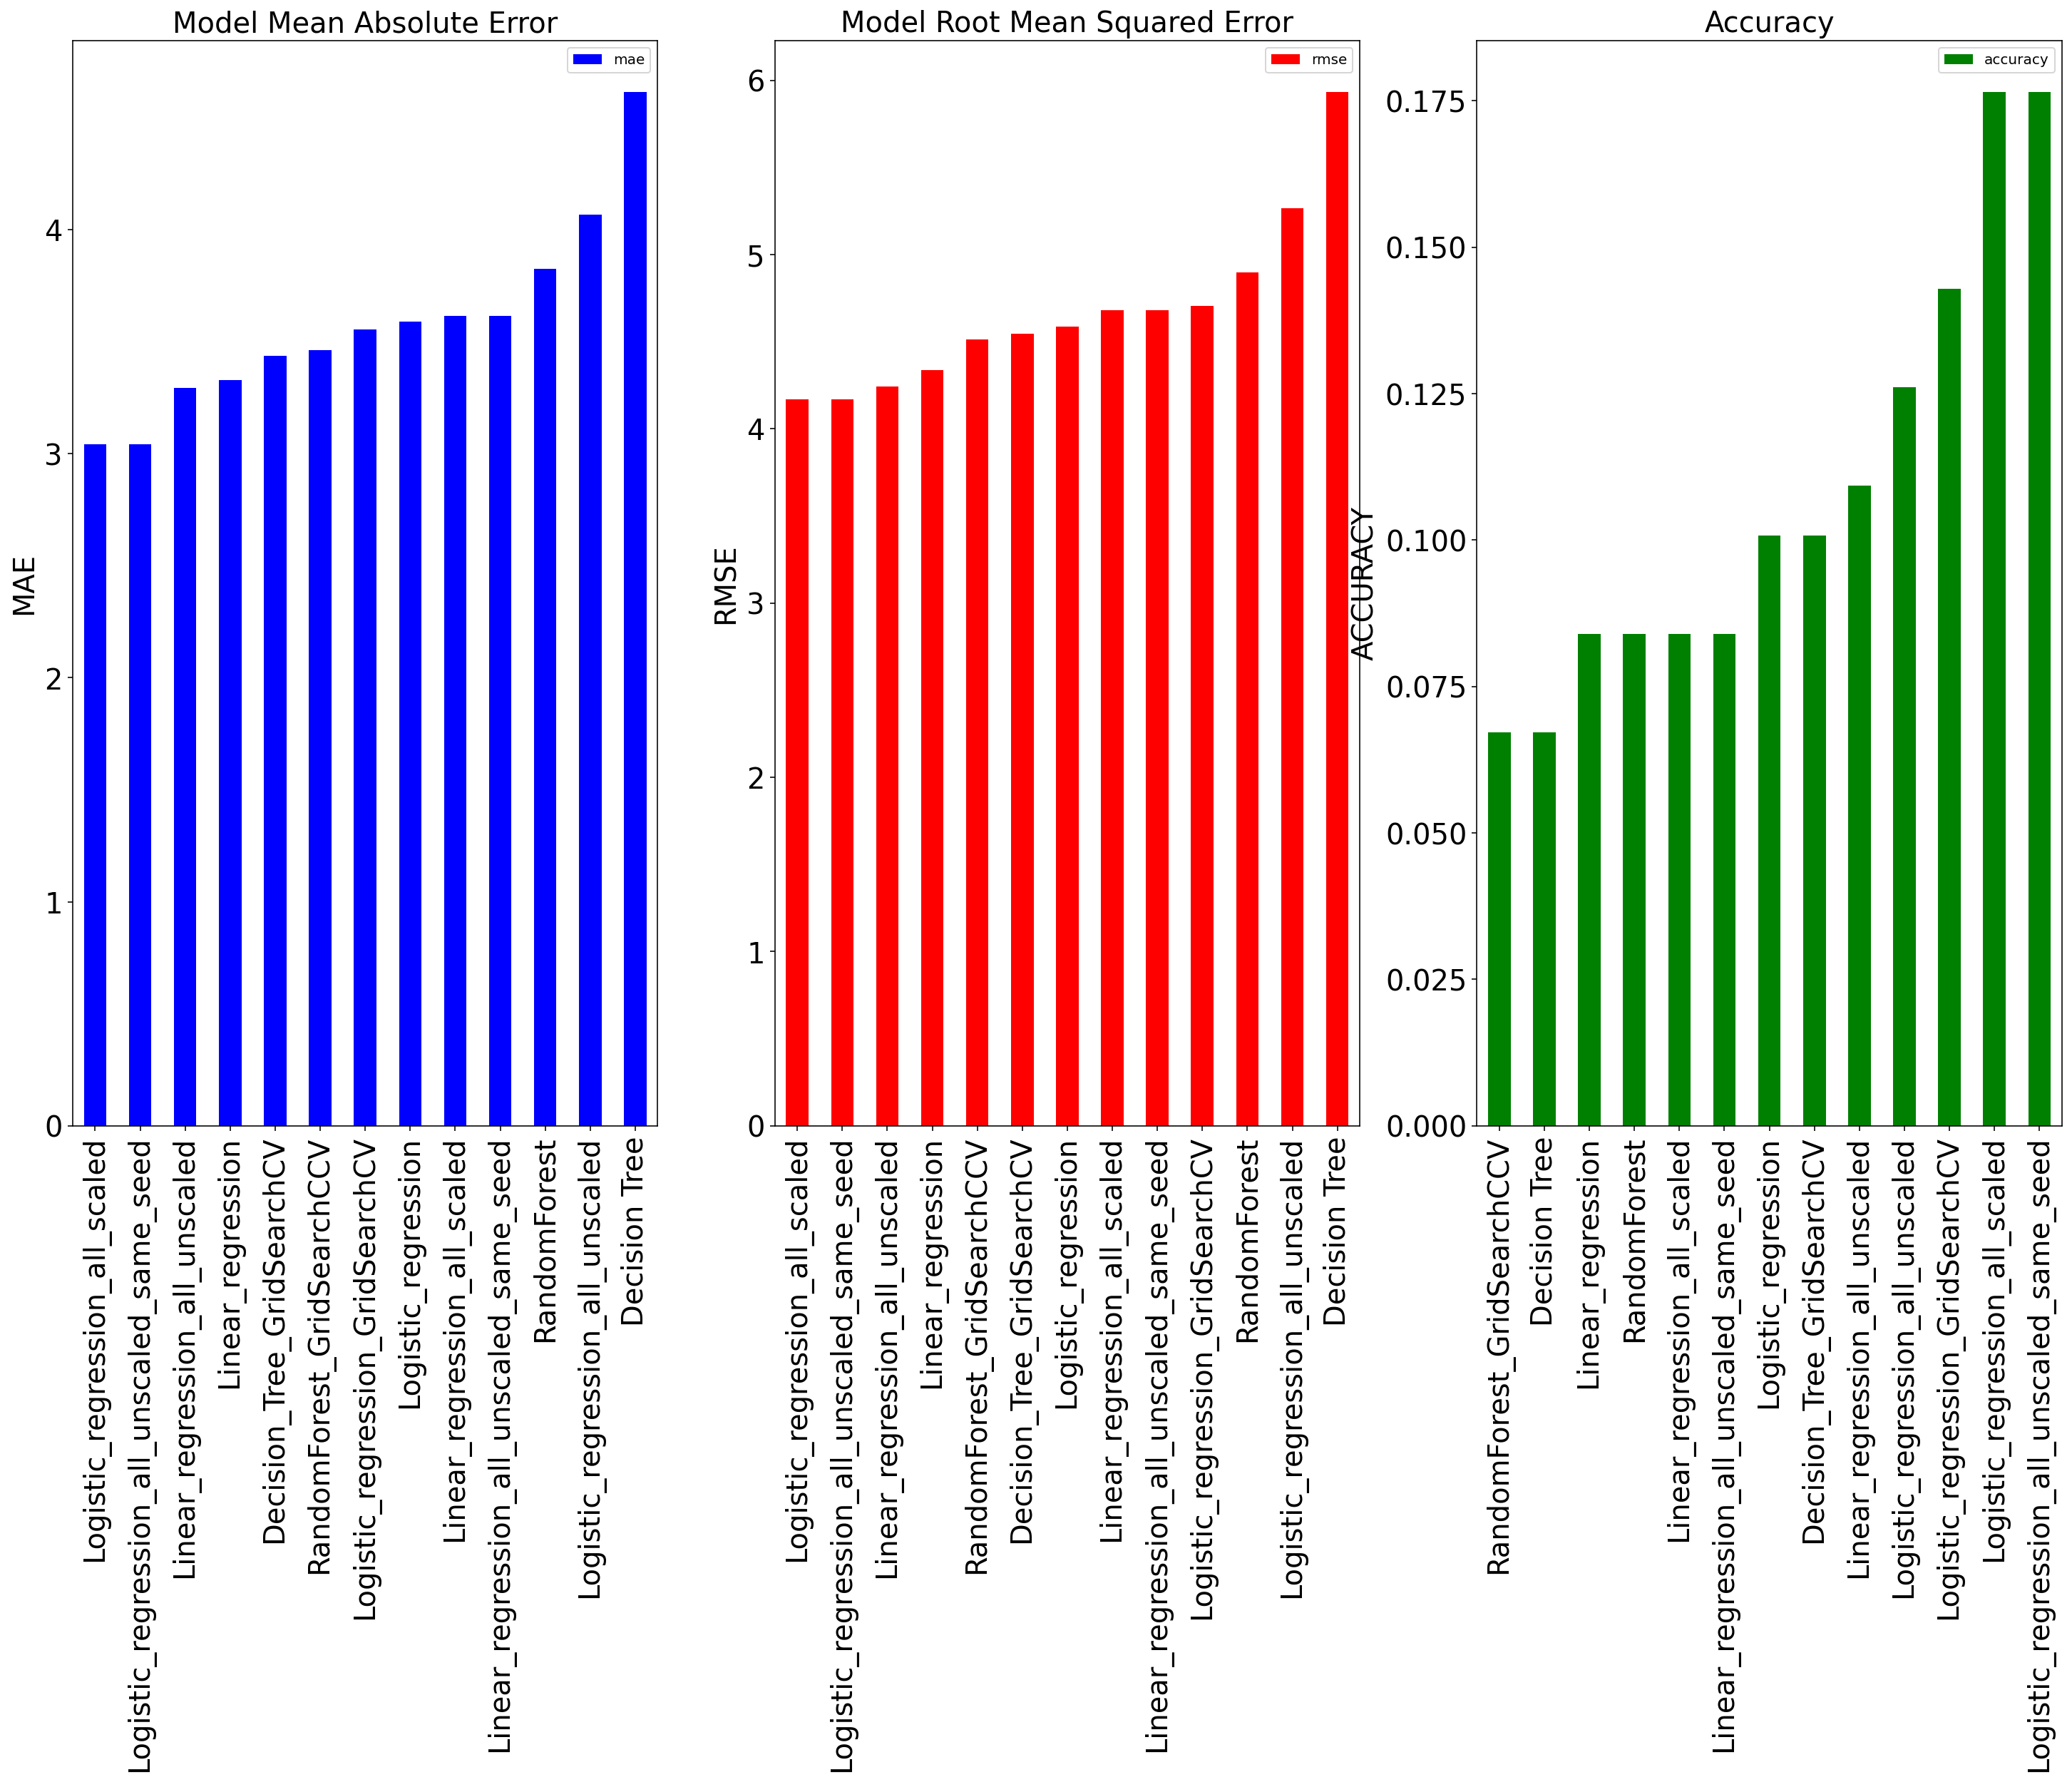

In [122]:
plt.figure(figsize=(25, 14))

# Root mean squared error
ax =  plt.subplot(1, 3, 1)
models_df.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20) 
plt.ylabel('MAE', fontsize=20)

# Median absolute percentage error
ax = plt.subplot(1, 3, 2)
models_df.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20) 
plt.ylabel('RMSE',fontsize=20)

ax = plt.subplot(1, 3, 3)
models_df.sort_values('accuracy', ascending = True).plot.bar(y = 'accuracy', color = 'g', ax = ax, fontsize=20)
plt.title('Accuracy', fontsize=20) 
plt.ylabel('ACCURACY',fontsize=20)

plt.show()

**Best model : LogisticRegression with all features, no matter scaled or unscaled**

### Feature importance

In [123]:
perm = PermutationImportance(lr, scoring='neg_root_mean_squared_error').fit(X_test_unscaled, y_test_unscaled)

In [124]:
eli5.show_weights(perm, feature_names=X_test_unscaled.columns.tolist())

Weight,Feature
0.7047 ± 0.4330,failures
0.3521 ± 0.1631,Fedu
0.3071 ± 0.1973,Walc
0.2170 ± 0.1220,famrel
0.2169 ± 0.0661,studytime
0.1692 ± 0.0453,Fjob_other
0.1673 ± 0.0743,Medu
0.1672 ± 0.2504,traveltime
0.1588 ± 0.0763,goout
0.1421 ± 0.1780,paid_no


In [125]:
perm_importance = eli5.explain_weights_df(perm).sort_values(by='weight',
                                                            ascending=False)

In [126]:
perm_importance = perm_importance[perm_importance['weight'] > 0]
perm_importance['f'] = perm_importance['feature'].apply(lambda x: int(x[1:]))
cols_perm = list(X_test_unscaled.columns[perm_importance['f']])
perm_importance['feature'] = cols_perm

In [127]:
perm_importance[:10]

,feature,weight,std,f
0,failures,0.704716,0.216486,5
1,Fedu,0.352053,0.081554,2
2,Walc,0.307082,0.098670,10
3,famrel,0.216954,0.060988,6
4,studytime,0.216871,0.033045,4
5,Fjob_other,0.169179,0.022630,30
6,Medu,0.167336,0.037173,1
7,traveltime,0.167238,0.125212,3
8,goout,0.158796,0.038157,8
9,paid_no,0.142101,0.089006,44


The hypothesis was confirmed, failures, Fedu and Walc influence the final score.
Also traveltime and quality of family relationship